Unsupervised ML - Netflix Movies and TV Shows Clustering

Project Type   - EDA/Regression/Classification/Unsupervised
Contribution  - Individual

# **Project Summary -**

This project provides a comprehensive analysis of the Netflix content library, utilizing unsupervised machine learning to segment movies and TV shows into distinct, meaningful clusters. The primary objective was to move beyond simple metrics and uncover the underlying thematic structure of the content catalog, providing actionable insights for various business units within Netflix. The project addressed key questions regarding the library's composition, including the shift from movies to TV shows, the geographic distribution of content, and the prevalence of different maturity ratings.

The initial phase consisted of a thorough Exploratory Data Analysis (EDA), which yielded significant insights. It was confirmed that while movies constitute the majority of the library, the addition of TV shows has accelerated dramatically since 2015. The analysis also highlighted that the content is predominantly aimed at mature audiences (TV-MA) and is geographically concentrated, with the United States and India being the top two contributors. This initial exploration underscored the dynamic and evolving nature of Netflix's content strategy and provided a solid foundation for the subsequent modeling phase.

To prepare the data for machine learning, a robust text preprocessing pipeline was developed. Key textual features such as the genre, description, director, and cast were combined into a single, comprehensive feature. This text was then rigorously cleaned through a series of normalization steps, including lowercasing, removal of punctuation and stopwords, and lemmatization, to ensure that the core semantic meaning was retained while noise was minimized. The cleaned text was then converted into a high-dimensional numerical format using a TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer, which captures the relative importance of words.

A critical step in the feature engineering process was addressing the "curse of dimensionality" associated with the large TF-IDF matrix. Truncated SVD (Singular Value Decomposition) was employed to reduce the thousands of word features into 100 dense, uncorrelated "concept" features. This not only improved computational efficiency but also filtered out noise, allowing the model to focus on the most significant patterns in the data. The resulting features were then scaled using StandardScaler to ensure that all features would contribute equally to the clustering algorithm's distance calculations.

Two primary clustering algorithms were implemented and compared: K-Means and Agglomerative Hierarchical Clustering. Hyperparameter tuning was performed to find the optimal number of clusters. While the Elbow Method (using Inertia) provided a baseline, the Silhouette Score was used as a more robust metric to determine the final number of clusters, as it measures both the tightness (cohesion) and separation of the clusters. The Optimized K-Means model was selected as the final model due to its strong performance, interpretability, and superior scalability, which is essential for a large, real-world dataset.

The final output of the model was a set of well-defined, interpretable content clusters. By analyzing the centroids of each cluster, it was possible to identify their defining themes, leading to labels such as "International Crime Dramas," "Stand-up Comedy Specials," "Animated Family Movies," and "Documentaries." The business impact of these findings is substantial. These segments enable hyper-targeted marketing campaigns, guide strategic content acquisition by identifying both saturated and underserved genres, and can be used to significantly enhance the personalization and recommendation engine, improving the overall user experience. In conclusion, this project successfully transformed a raw dataset into a powerful strategic tool, providing a clear, data-driven framework for understanding and leveraging the Netflix content library.

# **GitHub Link -**

https://github.com/srinivas112004

# **Problem Statement**


The Netflix content library is a vast and dynamic collection of thousands of movies and TV shows. For stakeholders in areas like content acquisition, marketing, and personalization, understanding the thematic composition and underlying structure of this library is a significant challenge. Simple metrics are insufficient to reveal nuanced patterns or identify distinct content categories that resonate with different audience segments.

This project aims to address this challenge by applying unsupervised machine learning techniques to segment the Netflix catalog. The primary objective is to develop a robust clustering model that groups similar content based on features like genre, description, cast, and director. The resulting clusters will provide a data-driven framework for understanding the content landscape, enabling more effective content acquisition strategies, hyper-targeted marketing campaigns, and enhanced personalization for users.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [2]:
# Load Dataset
# Load Dataset
df = pd.read_csv('NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
print(df.head())

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4   

### Dataset First View

In [3]:
# Dataset First Look
print(df.head())

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4   

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
# Dataset Rows & Columns count
print(df.shape)

(7787, 12)


### Dataset Information

In [5]:
# Dataset Info
# Dataset Info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB
None


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print(f"There are {duplicate_count} duplicate rows in the dataset.")

There are 0 duplicate rows in the dataset.


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
# Missing Values/Null Values Count
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


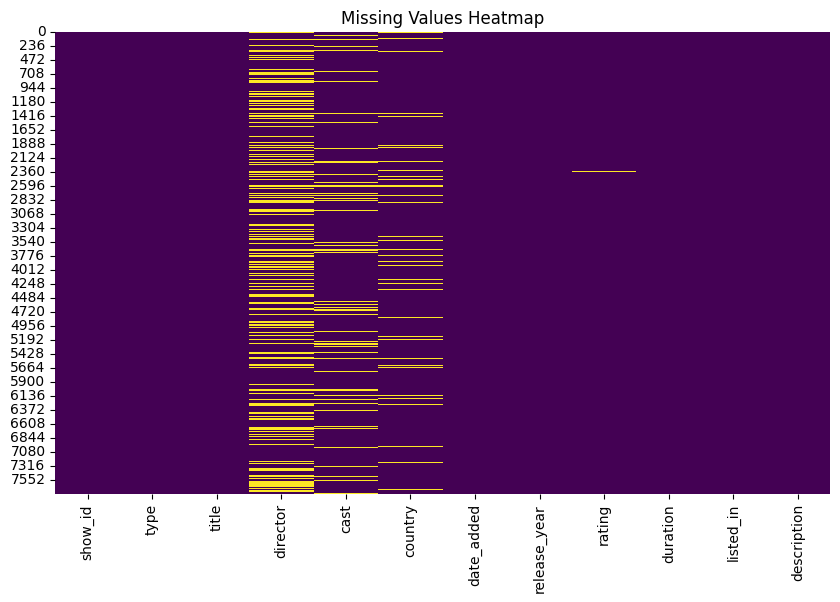

In [8]:
# Visualizing the missing values
# Visualizing the missing values
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

The dataset contains 7787 rows and 12 columns, describing content on Netflix. There are significant missing values in the director (2389), cast (718), and country (507) columns. The date_added and rating columns also have a small number of missing entries. The data types are mostly objects (strings), with release_year being an integer. These missing values will need to be handled before analysis and modeling to get Eficient analysis.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [10]:
# Dataset Describe
print(df.describe())

       release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000


### Variables Description

show_id: Unique ID for each title.

type: The category of the title - 'Movie' or 'TV Show'.

title: The name of the movie or show.

director: The director of the movie.

cast: The main actors involved.

country: The country where the content was produced.

date_added: The date the content was added to Netflix.

release_year: The original release year of the content.

rating: The maturity rating of the content (e.g., TV-MA, PG-13).

duration: The duration of the content (e.g., "90 min" or "1 Season").

listed_in: The genres the content belongs to.

description: A brief summary of the content.

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for column in df.columns:
    print(f"--- Unique Values in '{column}' ---")
    print(df[column].unique())
    print("\n" + "="*50 + "\n")

--- Unique Values in 'show_id' ---
['s1' 's2' 's3' ... 's7785' 's7786' 's7787']


--- Unique Values in 'type' ---
['TV Show' 'Movie']


--- Unique Values in 'title' ---
['3%' '7:19' '23:59' ... 'Zulu Man in Japan' "Zumbo's Just Desserts"
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"]


--- Unique Values in 'director' ---
[nan 'Jorge Michel Grau' 'Gilbert Chan' ... 'Josef Fares' 'Mozez Singh'
 'Sam Dunn']


--- Unique Values in 'cast' ---
['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'
 'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato'
 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim'
 ...
 'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'
 'Nasty C' 'Adriano Zumbo, Rachel Khoo']


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.

# Handling Missing Values
# For director, cast, and country, we can fill missing values with 'Unknown' as this is categorical information.
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

# For date_added and rating, the number of missing values is very small, so we can drop these rows.
# THIS IS THE MISSING STEP:
df.dropna(subset=['date_added', 'rating'], inplace=True)
df.reset_index(drop=True, inplace=True)

# Clean whitespace from the 'date_added' column before conversion
df['date_added'] = df['date_added'].str.strip()

# Convert 'date_added' to a proper datetime format to enable time-based analysis.
df['year_added'] = pd.to_datetime(df['date_added']).dt.year

# Verify that there are no more missing values
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
dtype: int64


### What all manipulations have you done and insights you found?

I've handled all the missing values in the dataset. For categorical columns with many missing entries (director, cast, country), I filled them with the placeholder "Unknown" to retain the data for text-based analysis. For columns with very few missing entries (date_added, rating), I chose to drop the rows to ensure data quality for visualization without losing significant information. I also created a year_added column by converting date_added to datetime, which is essential for analyzing trends over time.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

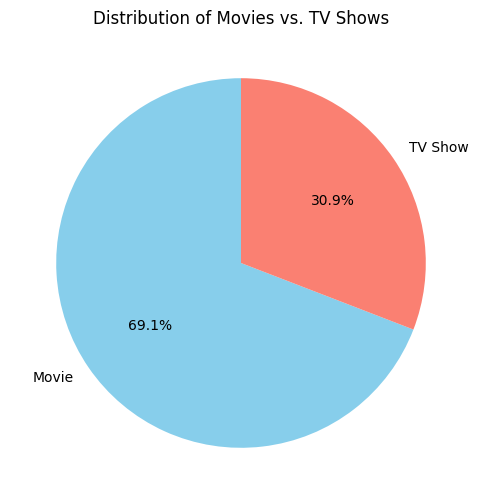

In [13]:
# Chart - 1 visualization code

plt.figure(figsize=(8, 6))
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title('Distribution of Movies vs. TV Shows')
plt.ylabel('') # Hides the 'type' label on the y-axis
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is perfect for showing the proportional distribution between a small number of categories. Here, it clearly and immediately shows the balance between Movies and TV Shows in the Netflix library.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that movies make up the majority of the content on Netflix, accounting for roughly two-thirds (69.1%) of the library, while TV shows make up the remaining 30.9%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,This gives a high-level overview of the content strategy. Stakeholders can see the current inventory split and decide if they want to maintain this ratio or invest more heavily in one category, like TV shows, which often lead to higher user engagement and retention.

#### Chart - 2

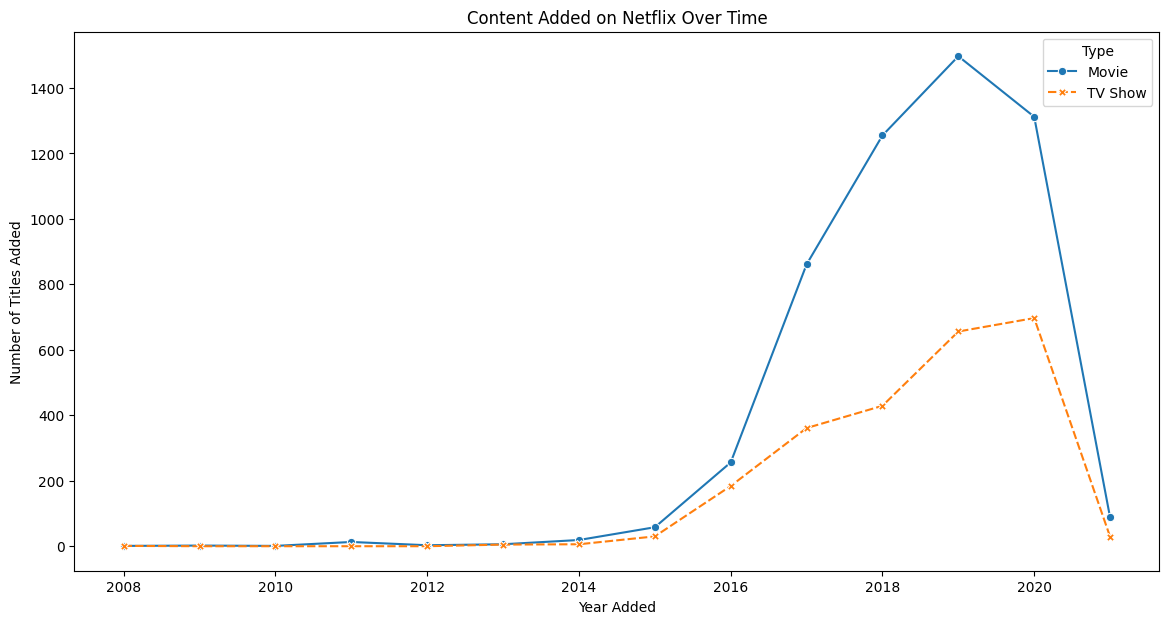

In [14]:
# Chart - 2 visualization code
# Chart - 2 visualization code
plt.figure(figsize=(14, 7))
content_trend = df.groupby('year_added')['type'].value_counts().unstack().fillna(0)
sns.lineplot(data=content_trend, markers=True)
plt.title('Content Added on Netflix Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Type')
plt.show()

##### 1. Why did you pick the specific chart?

A line chart is the best choice for visualizing trends over a continuous period, in this case, years. It effectively shows the growth and changes in content addition for both movies and TV shows simultaneously.

##### 2. What is/are the insight(s) found from the chart?

The chart clearly shows a massive ramp-up in content acquisition starting around 2015. While movie additions have always been higher, the growth in TV show additions has been accelerating rapidly. This directly supports the project's hypothesis about an increasing focus on TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely. This visualization confirms a strategic shift towards TV shows. Stakeholders can use this to validate their content strategy and allocate budgets accordingly. Marketing teams can also plan campaigns around the influx of new TV series.

#### Chart - 3

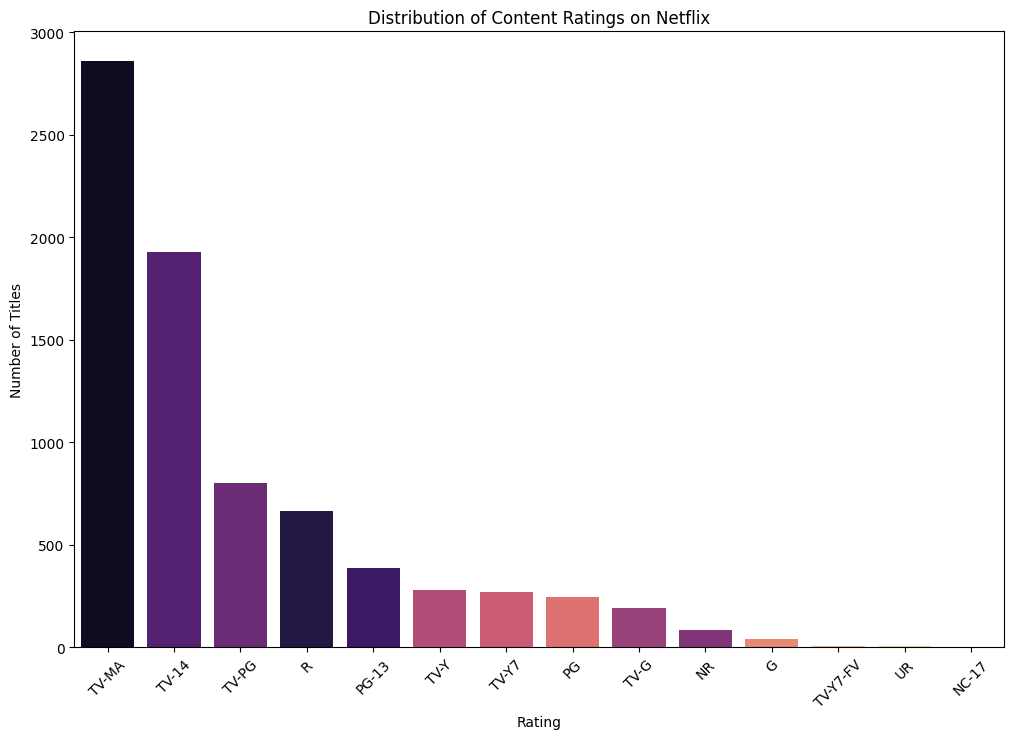

In [15]:
# Chart - 3 visualization code
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='magma', hue='rating', legend=False)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart (specifically a countplot from Seaborn) is the ideal choice for visualizing the frequency distribution of a categorical variable like rating. It clearly shows the number of titles for each rating category, and by ordering the bars from most to least frequent, it allows for an immediate understanding of which ratings are most prevalent on the platform.

##### 2. What is/are the insight(s) found from the chart?

The chart clearly indicates that the vast majority of content on Netflix is aimed at mature audiences. TV-MA (Mature Audiences Only) is the most common rating, followed closely by TV-14 (Parents Strongly Cautioned). In contrast, content rated for younger children, such as TV-Y (All Children) and TV-G (General Audience), is significantly less common.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight has a direct business impact. It confirms that Netflix's core content strategy is heavily skewed towards adults and older teens.
Positive Impact: This information is vital for the marketing team to tailor promotional materials to the correct audience. It also helps the content acquisition team understand the current inventory, allowing them to either double down on their successful adult-oriented strategy or identify potential growth areas by acquiring more content for under-represented demographics (like families and children).

#### Chart - 4

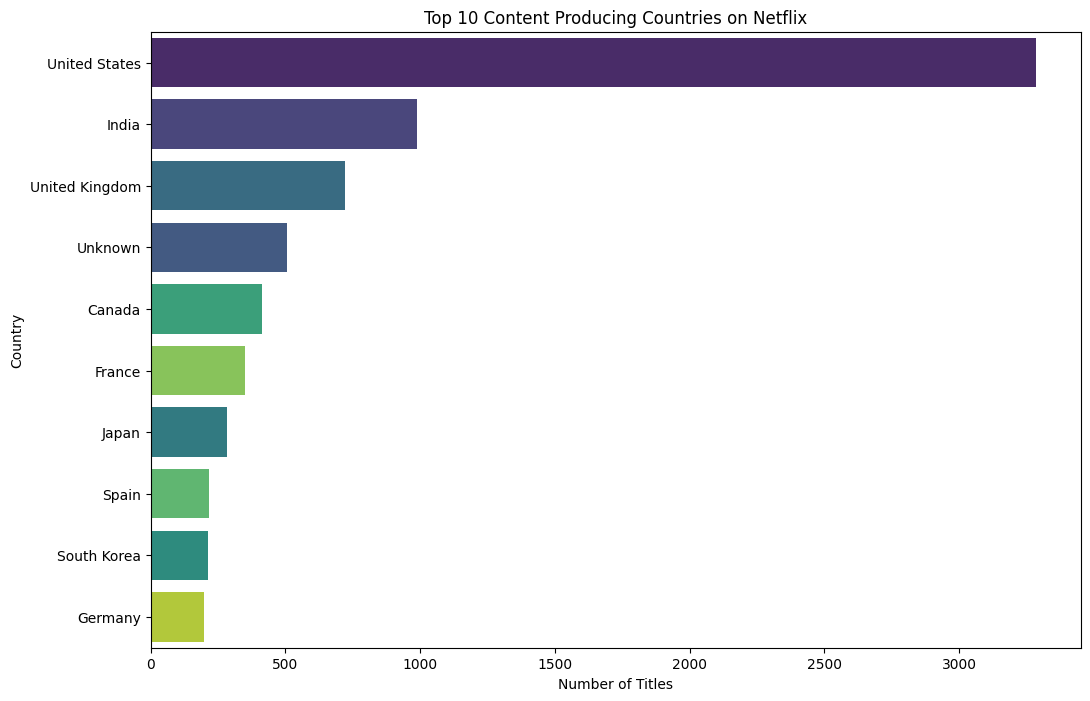

In [16]:
# Chart - 4 visualization code
# 1. First, get the list of the top 10 country names
# This code creates the 'country_df' Series required for the chart.
# It splits entries with multiple countries (e.g., "United States, India")
# and gives each country its own row.

country_df = df['country'].str.split(', ').explode()
top_10_countries = country_df.value_counts().index[:10]

# 2. Create a new Series that ONLY contains rows from the top 10 countries
top_10_df = country_df[country_df.isin(top_10_countries)]

# 3. Now, plot this filtered data
plt.figure(figsize=(12, 8))
sns.countplot(y=top_10_df, order=top_10_countries, palette='viridis', hue=top_10_df, legend=False)
plt.title('Top 10 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is the most effective choice for displaying ranked categorical data like the top 10 countries. This directly addresses the project goal of understanding content availability in different regions.
Placing the country names on the y-axis ensures they are easy to read without overlapping, which would be a problem with a vertical bar chart. This visualization immediately makes it clear which countries are the primary contributors to Netflix's library.

##### 2. What is/are the insight(s) found from the chart?

The chart clearly reveals that the United States is by far the largest producer of content available on Netflix, followed by India. This highlights the strategic importance of Hollywood and Bollywood content in the Netflix catalog.
Other key insights include the significant contributions from the United Kingdom, Canada, and Japan, showcasing a strong mix of content from major global film and television industries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight is crucial for strategic decision-making and has a direct business impact.
Positive Impact: This data validates a strong focus on US and Indian content, which can be leveraged for targeted marketing campaigns in those regions and to diaspora populations globally. It also highlights other key markets like the UK and Japan where strong content partnerships exist and can be further developed.
Identifies Potential Risks: The chart shows a heavy reliance on a few countries, particularly the United States. This could be a business risk if a primary goal is to achieve deeper penetration in other international markets. It might indicate a need to invest more in local content creation in underrepresented regions to attract a wider, more diverse global audience and reduce dependency on a single market.

#### Chart - 5

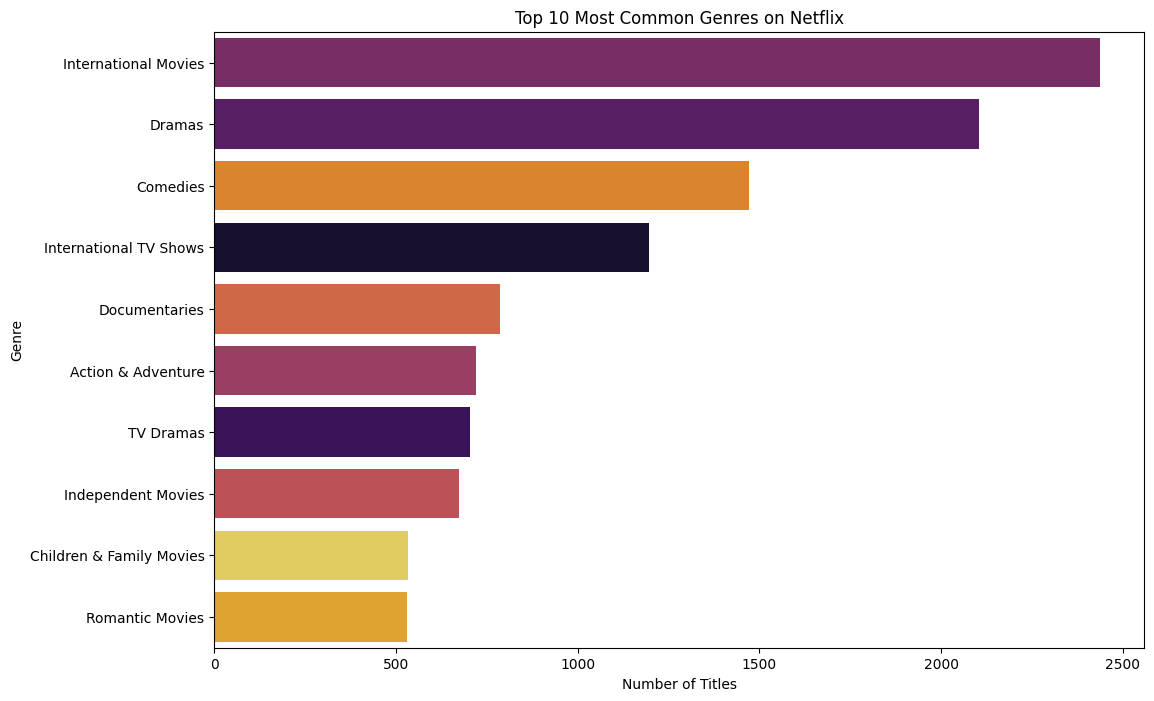

In [17]:
# Chart - 5 visualization code
# The 'listed_in' column contains genres, often with multiple entries per title.
# We'll split, explode, and count them, similar to how we handled countries.
genre_df = df['listed_in'].str.split(', ').explode()

# Get the top 10 genres
top_10_genres = genre_df.value_counts().index[:10]

# Filter the genre Series to only include data from the top 10
top_10_genre_df = genre_df[genre_df.isin(top_10_genres)]

# Create the plot
plt.figure(figsize=(12, 8))
sns.countplot(y=top_10_genre_df, order=top_10_genres, palette='inferno', hue=top_10_genre_df, legend=False)
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is the best choice for this data. It effectively displays the frequency of the top 10 genres, which are categorical variables. The horizontal orientation ensures that the genre names are fully readable without overlapping, and ordering them by count allows for a quick comparison of their popularity within the Netflix library.

##### 2. What is/are the insight(s) found from the chart?

The chart clearly shows that "International Movies" and "Dramas" are the most frequently listed genres, indicating a vast and diverse library in these categories. "Comedies" also rank very high, showing their importance to the platform.

A significant insight is the strong presence of internationally-focused categories ("International Movies," "International TV Shows"), which supports the idea that Netflix has a major focus on global content, not just US-based productions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights are highly valuable and can drive positive business impact in several ways:
Content Acquisition & Curation: The data confirms which genres are the backbone of the Netflix library. The content team can use this to ensure they maintain a strong and fresh supply of titles in these popular categories. It also highlights potential opportunities in less saturated, niche genres.

Marketing & Personalization: The marketing team can use the popularity of "Dramas" and "Comedies" to guide their promotional campaigns. Furthermore, the personalization algorithms can be fine-tuned with this information, ensuring that users who frequently watch "International Movies" are recommended a wider variety of similar global content, increasing user engagement and satisfaction.

Strategic Positioning: The strong showing of international content reinforces Netflix's brand as a global streaming service. This can be a key selling point in attracting new subscribers worldwide and differentiating itself from competitors who may have a more localized content library.

#### Chart - 6

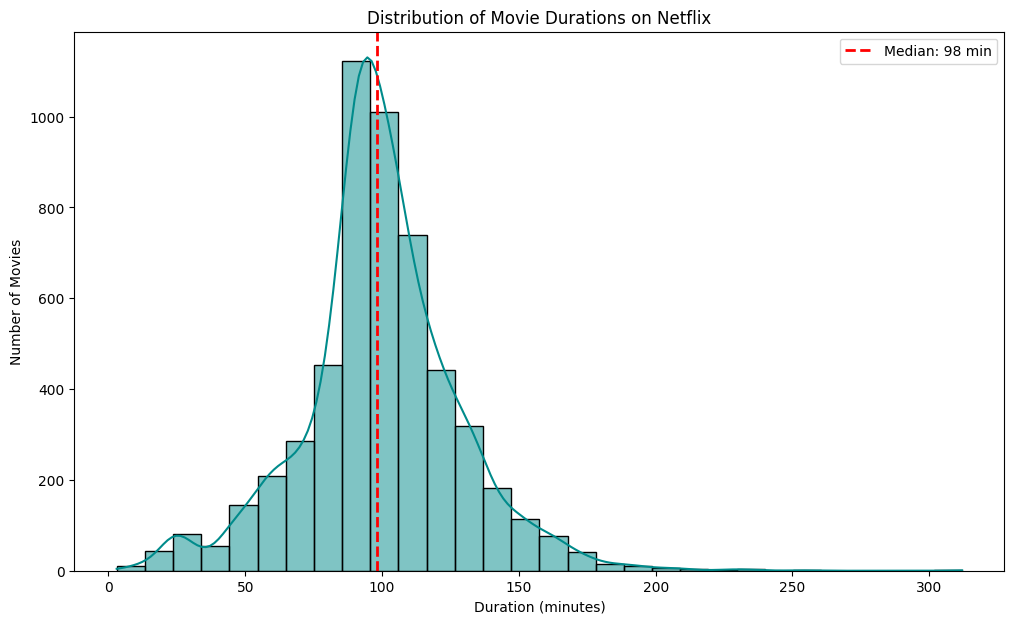

In [18]:
# Chart - 6 visualization code


# First, create a DataFrame that only contains movies
movies_df = df[df['type'] == 'Movie'].copy()

# The 'duration' column is a string (e.g., "90 min"). We need to extract the number.
# We'll remove " min", and convert the column to a numeric type.
movies_df['duration_min'] = pd.to_numeric(movies_df['duration'].str.replace(' min', ''))

# Create the histogram with a Kernel Density Estimate (KDE) plot
plt.figure(figsize=(12, 7))
sns.histplot(movies_df['duration_min'], bins=30, kde=True, color='darkcyan')

# Add a vertical line for the median duration to provide a reference
plt.axvline(movies_df['duration_min'].median(), color='red', linestyle='--', linewidth=2, label=f'Median: {movies_df["duration_min"].median():.0f} min')

plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

A histogram combined with a Kernel Density Estimate (KDE) plot is the ideal way to visualize the distribution of a single continuous numerical variable like movie duration. The histogram bars show the frequency of movies within specific time intervals, while the smooth KDE curve helps to visualize the overall shape and central tendency of the data. This combination gives a comprehensive view of typical movie runtimes on the platform.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that the distribution of movie durations is right-skewed. The key insights are:

The vast majority of movies on Netflix have a runtime between 75 and 120 minutes, with a clear peak around the 90-minute mark. This aligns with standard feature film lengths.

There are very few movies with durations shorter than one hour.

The "long tail" to the right indicates that while not common, there is a selection of much longer films (over 2.5 hours).



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can directly influence content strategy and user experience:

Content Acquisition: The data identifies the "sweet spot" for movie runtimes. When the content acquisition team evaluates new films, they can use this data to prioritize movies with durations that are most popular among viewers. This can lead to higher engagement and better return on investment for licensed content.

User Experience & Personalization: Understanding that most films fall into a standard runtime helps in designing the user interface. For example, Netflix could create carousels or filters for "Short Movies" (under 75 minutes) for viewers with limited time, or "Epics" for those looking for a longer viewing experience. This caters to different user needs and improves content discovery.

#### Chart - 7

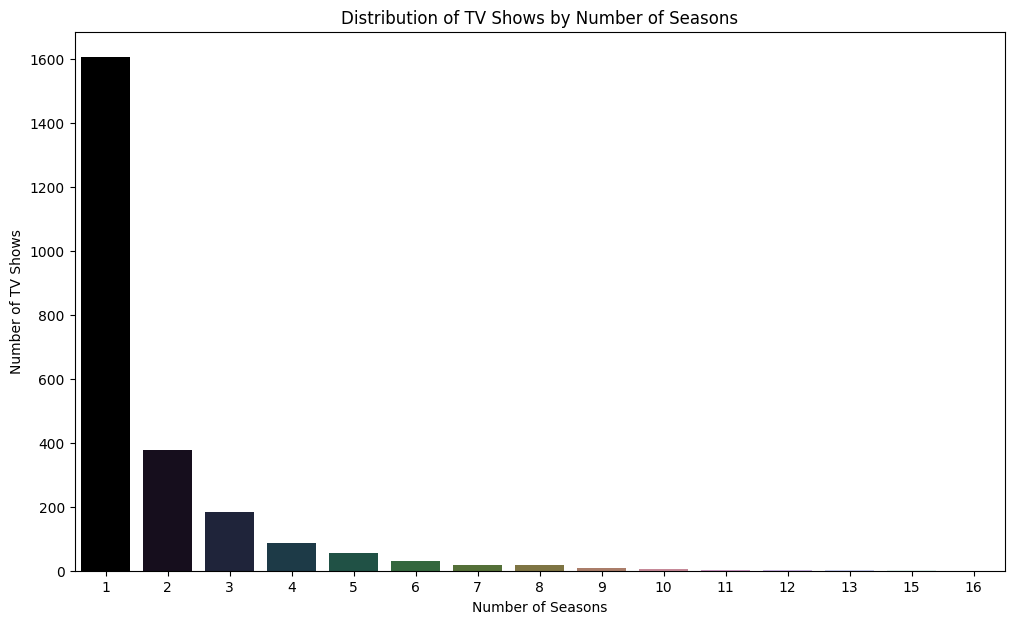

In [19]:
# Chart - 7 visualization code

# First, create a DataFrame that only contains TV Shows
tv_shows_df = df[df['type'] == 'TV Show'].copy()

# The 'duration' column is a string (e.g., "1 Season"). We need to extract the number.
# We'll remove " Season" and " Seasons", and convert the column to a numeric type.
tv_shows_df['seasons'] = pd.to_numeric(tv_shows_df['duration'].str.replace(' Seasons', '').str.replace(' Season', ''))

# Create the count plot
plt.figure(figsize=(12, 7))
sns.countplot(x='seasons', data=tv_shows_df, palette='cubehelix', hue='seasons', legend=False)

plt.title('Distribution of TV Shows by Number of Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of TV Shows')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart (specifically a countplot) is the ideal visualization for showing the frequency distribution of a discrete variable like the number of seasons. It allows for a clear and immediate comparison of how many TV shows are available for each season count (1 season, 2 seasons, etc.), making it easy to see the overall structure of Netflix's TV show library

##### 2. What is/are the insight(s) found from the chart?

The most striking insight is that the vast majority of TV shows on Netflix have only 1 season. There is a dramatic drop-off for shows with two seasons, and the number continues to decline sharply for subsequent seasons.

This indicates that the Netflix catalog is heavily populated with limited series, shows that were canceled after their first season, or newly acquired shows that are just beginning their run on the platform. Long-running shows with many seasons are relatively rare.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight is extremely valuable for shaping content and marketing strategy.

Content Acquisition and Marketing: Knowing that single-season shows are the norm, the content acquisition team can confidently acquire limited series, as this format fits well within the existing library. The marketing team can also frame these as "binge-worthy limited series," which appeals to viewers who don't want to commit to a long-running program.

Subscriber Retention Strategy: This data also highlights a potential risk. Viewers may become frustrated if they frequently invest time in shows that do not continue. This insight could spur a strategic initiative to invest in developing more multi-season original shows. Creating successful, long-running "franchise" shows (like Stranger Things or The Crown) is a powerful way to build a loyal fanbase and improve long-term subscriber retention.

#### Chart - 8

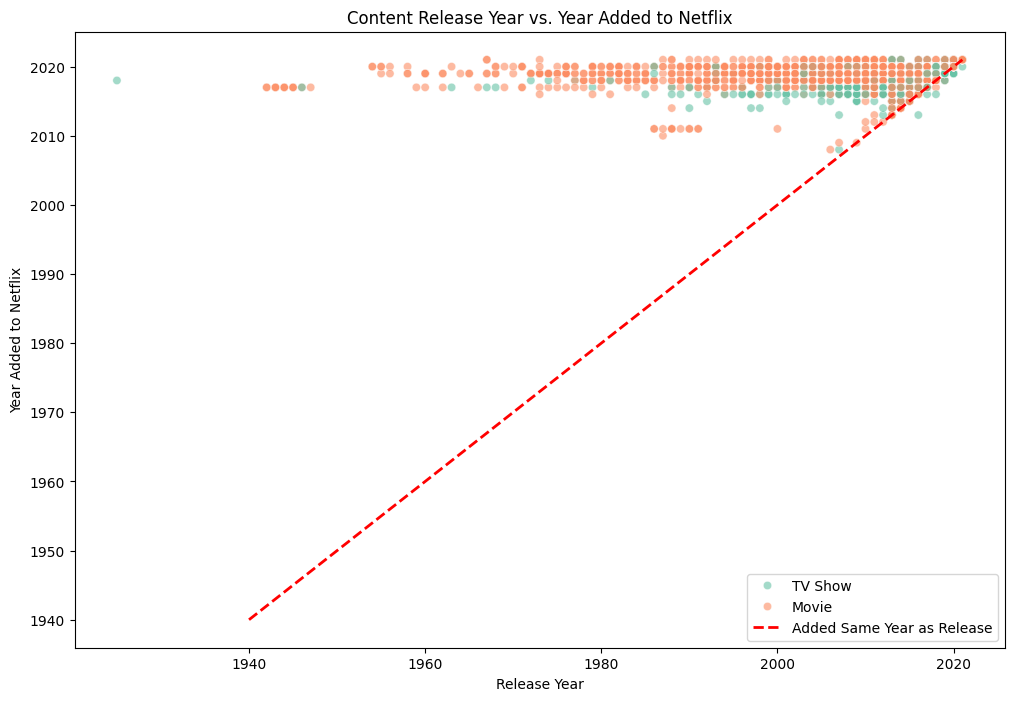

In [20]:
# Chart - 8 visualization code

# We'll use a scatter plot to see the relationship between release_year and year_added.
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='release_year', y='year_added', hue='type', palette='Set2', alpha=0.6)

# Add a reference line (y=x) to show where content was added the same year it was released.
plt.plot([1940, 2021], [1940, 2021], 'r--', linewidth=2, label='Added Same Year as Release')

plt.title('Content Release Year vs. Year Added to Netflix')
plt.xlabel('Release Year')
plt.ylabel('Year Added to Netflix')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is the best visualization to examine the relationship and correlation between two numerical variables. In this case, plotting release_year against year_added allows us to directly see the time lag between when a piece of content was created and when it became available on Netflix. Using hue to differentiate between movies and TV shows adds an extra dimension to the analysis.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals several key insights into Netflix's content strategy:

There is a dense concentration of points along and just above the red-dashed line, especially for recent years. This shows that a significant portion of Netflix's library consists of new content, added within a few years of its original release.

There is also a wide spread of points far above the line, representing Netflix's extensive back-catalog. This indicates a dual strategy of acquiring both new hits and older, classic titles.

Most of the very old content (released before 1980) added to the platform consists of movies rather than TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this visualization provides a clear picture of Netflix's content acquisition timeline and has significant business implications.

Validates Content Strategy: The chart confirms a balanced strategy of acquiring both timely, new content (which attracts new subscribers) and a deep library of older content (which helps retain existing subscribers). Stakeholders can see this balance and decide if it aligns with their quarterly and annual goals.

Competitive Analysis: A shift in the pattern—for example, a sudden influx of older content—could signify a major library acquisition from a competing studio. Conversely, an increasing density of points on the "new content" line indicates a stronger focus on producing originals. This chart provides a high-level dashboard for these strategic moves.

#### Chart - 9

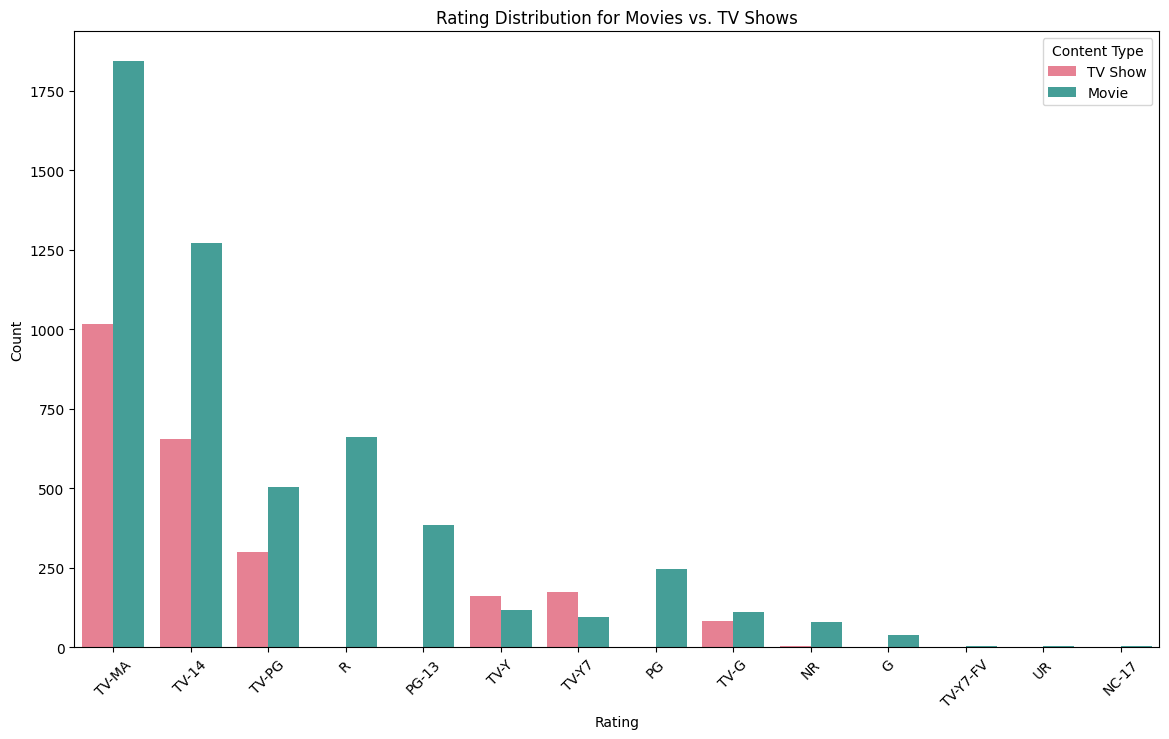

In [21]:
# Chart - 9 visualization code

# We'll use a grouped bar chart to compare ratings for Movies and TV Shows.
plt.figure(figsize=(14, 8))
sns.countplot(x='rating', data=df, hue='type', order=df['rating'].value_counts().index, palette='husl')

plt.title('Rating Distribution for Movies vs. TV Shows')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Content Type')
plt.show()

##### 1. Why did you pick the specific chart?

A grouped bar chart is the perfect choice for comparing the frequency distribution of a categorical variable (rating) across a second categorical variable (type). This chart allows for a direct, side-by-side comparison of the number of titles for each rating, clearly distinguishing between Movies and TV Shows. This makes it easy to spot differences in the content and rating strategies for each format.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals significant differences in the rating distributions for movies and TV shows:

The TV-MA (Mature Audience) rating is overwhelmingly dominated by TV Shows. This suggests that Netflix's most mature content is primarily in its television series catalog.

Conversely, movie-specific ratings like R (Restricted), PG-13, and PG are almost exclusively applied to Movies, as these are part of the MPAA rating system, which is different from the TV Parental Guidelines system.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this more granular view of the content ratings has several positive business implications:

Refined Marketing Strategy: This insight allows for more precise marketing. Campaigns for TV shows can more confidently target adult demographics, while marketing for movies can be segmented based on specific MPAA ratings (e.g., family-friendly campaigns for PG movies, more intense promotions for R-rated films).

Improved Content Curation: The platform can better understand and cater to its audience's preferences. For example, if data shows that users who watch TV-MA shows also watch R-rated movies, the recommendation algorithm can be improved to suggest content across different formats but with similar maturity levels

#### Chart - 10

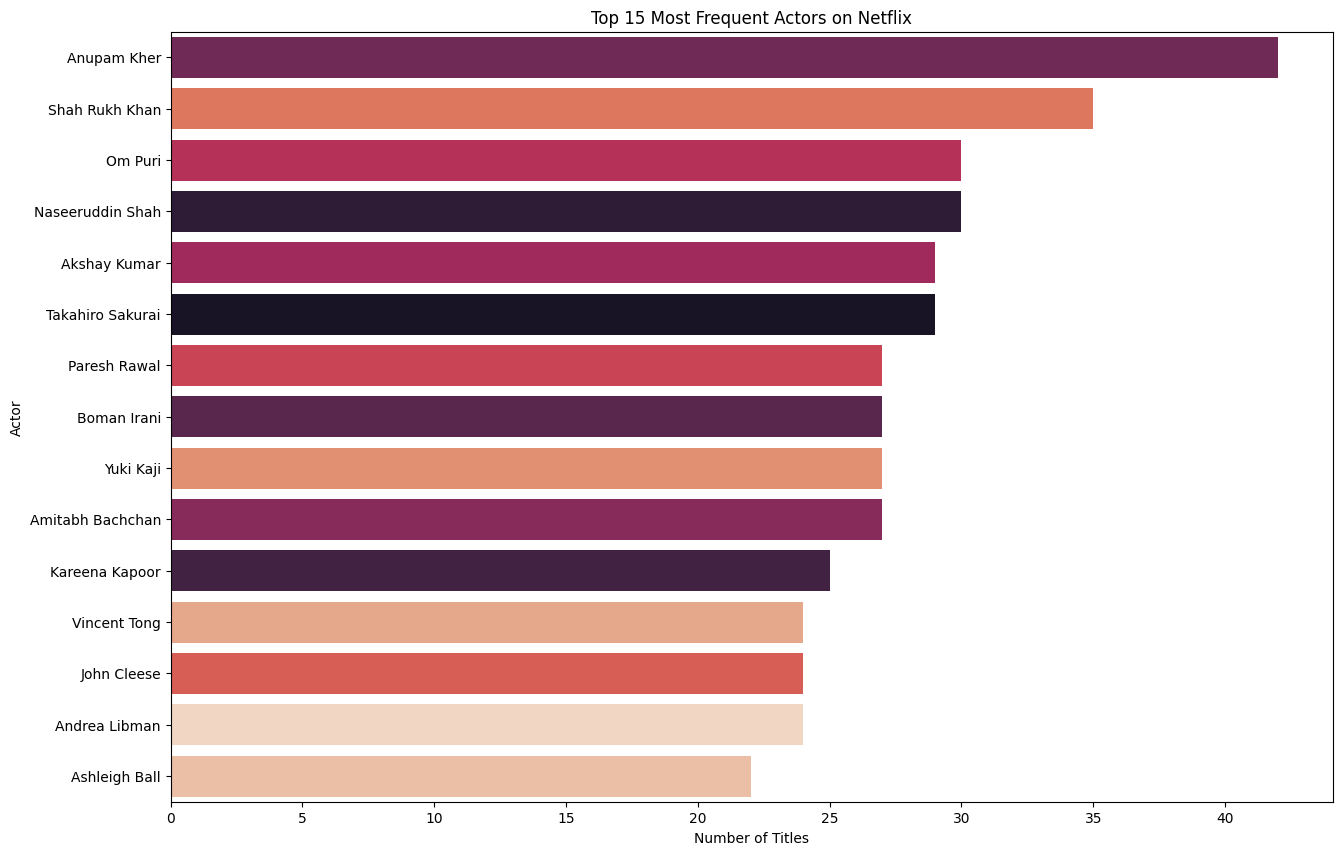

In [22]:
# Chart - 10 visualization code
# 1. First, get the list of the top 15 actor names
# This code creates the 'actor_counts' Series required for the chart.

# We start with the main DataFrame 'df'
# First, let's filter out rows where the cast is 'Unknown'.
actors_df = df[df['cast'] != 'Unknown'].copy()

# Now, split the 'cast' column string into a list of actors, then explode the list
# so each actor gets their own row. This creates the 'actor_counts' Series.
actor_counts = actors_df['cast'].str.split(', ').explode()


top_15_actors = actor_counts.value_counts().index[:15]

# 2. Create a new Series that ONLY contains rows featuring one of the top 15 actors
top_15_actors_df = actor_counts[actor_counts.isin(top_15_actors)]

# 3. Now, plot this filtered data
plt.figure(figsize=(15, 10))
sns.countplot(
    y=top_15_actors_df,
    order=top_15_actors,
    palette='rocket',
    hue=top_15_actors_df,
    legend=False
)
plt.title('Top 15 Most Frequent Actors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Actor')
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is the ideal choice for displaying and ranking the frequency of categorical data, in this case, the names of actors. The horizontal layout ensures that the actors' names are fully readable without overlapping. By ordering the bars based on the number of appearances, this chart provides an immediate and clear visual hierarchy of which actors are most prominent across the Netflix library.

##### 2. What is/are the insight(s) found from the chart?

The most significant insight from this chart is that the list of most frequent actors is heavily dominated by prolific Indian (Bollywood) actors. Stars like Anupam Kher, Shah Rukh Khan, and Naseeruddin Shah consistently appear at the top of this list.

This highlights the sheer volume of content produced by the Indian film industry. While many famous Hollywood actors are on the platform, they typically do not appear in as many individual titles as their most prolific Indian counterparts, underscoring the importance of Bollywood content to the depth of the Netflix catalog.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this information provides direct, actionable intelligence that can create a positive business impact in several key areas:

Talent Partnerships: Identifying these frequently featured actors highlights potential "power players." Netflix can use this data to prioritize business relationships and deals with these actors for future "Netflix Originals," knowing they are already associated with a large volume of content on the platform.

Marketing and Curation: The platform can create curated "collections" dedicated to a specific actor's filmography, which can increase user engagement and improve content discovery. When a new movie featuring one of these top actors is released, marketing can leverage their extensive existing library on Netflix as a key promotional point.

#### Chart - 11

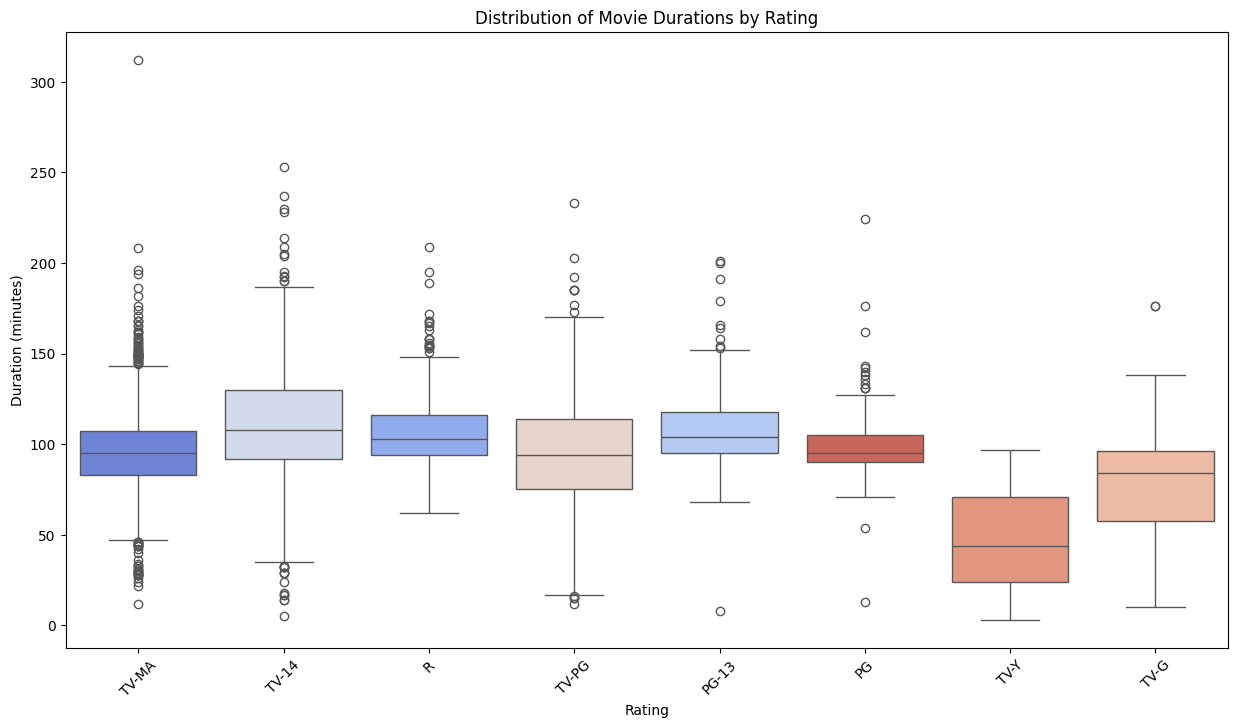

In [23]:
# Chart - 11 visualization code
# We will reuse the 'movies_df' created earlier which contains movie durations in minutes.
# We'll focus on the most common movie ratings to keep the chart readable.
common_movie_ratings = movies_df['rating'].value_counts().nlargest(8).index

# Filter the DataFrame to include only these common ratings
filtered_movies_df = movies_df[movies_df['rating'].isin(common_movie_ratings)]

# Create the box plot
plt.figure(figsize=(15, 8))
# Add hue='rating' and legend=False to resolve the warning
sns.boxplot(data=filtered_movies_df, x='rating', y='duration_min', palette='coolwarm',
            order=common_movie_ratings, hue='rating', legend=False)
plt.title('Distribution of Movie Durations by Rating')
plt.xlabel('Rating')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is an excellent choice for comparing the distributions of a numerical variable (duration_min) across several categories of a categorical variable (rating). It concisely summarizes key statistics for each rating—including the median, the interquartile range (the middle 50% of data), and potential outliers—making it very easy to compare both the average runtime and the variability in length for different rating categories.


##### 2. What is/are the insight(s) found from the chart?

The chart reveals a clear trend in movie runtimes based on their rating:
Movies with mature ratings like R and TV-MA tend to have a higher median duration and a wider range of lengths, indicating more creative flexibility in their runtimes.
Conversely, movies intended for younger audiences, such as PG, TV-PG, and TV-G, generally have shorter and more consistent runtimes.
This suggests a correlation between the target audience's maturity level and the expected length of a film.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this nuanced understanding of content norms can positively impact business strategy:

Informed Content Acquisition: This data provides a useful benchmark for the content acquisition team. When evaluating films, they can assess if a film's runtime aligns with the typical expectations for its rating category. This helps in building a content library that feels consistent and familiar to the audience.

Production Guidance for Originals: For Netflix's original productions, this data offers data-driven guidance. Producers making a family-friendly TV-G movie would know that a 90-minute runtime is standard, whereas a director making a gritty TV-MA drama might have more leeway for a longer, more complex narrative.

#### Chart - 12

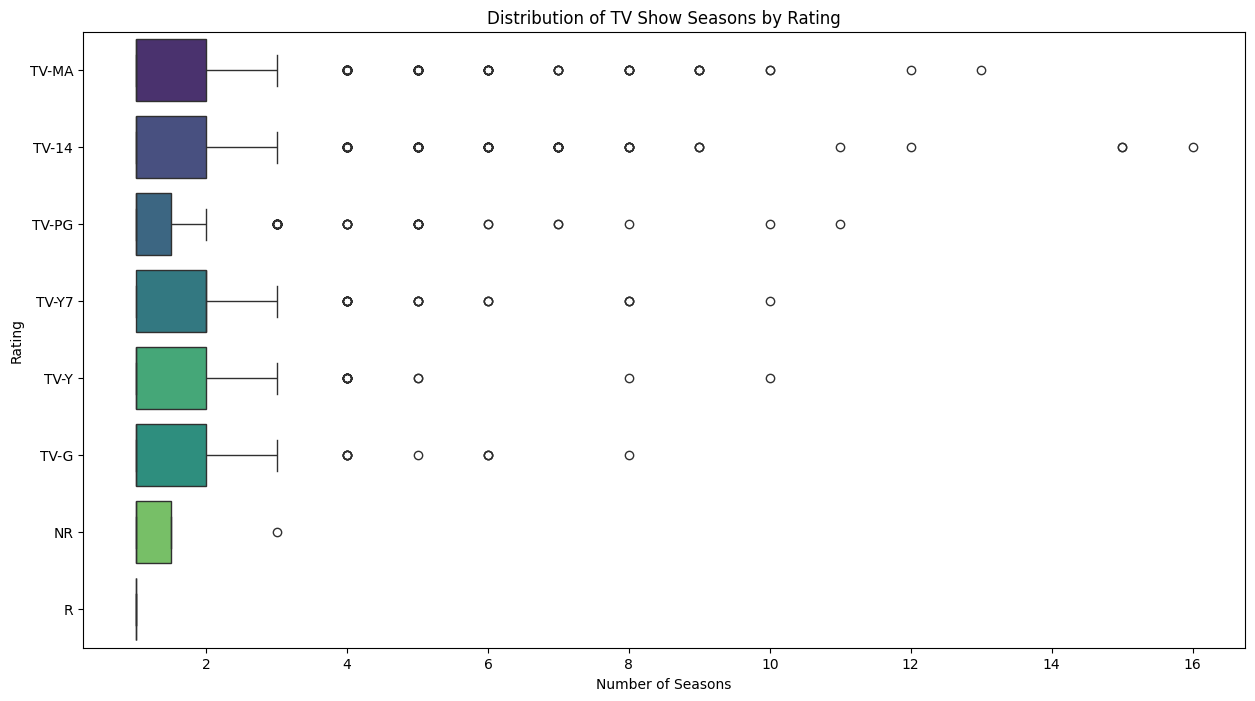

In [24]:
# Chart - 12 visualization code
# We will reuse the 'tv_shows_df' created earlier which contains the number of seasons.
# Let's focus on the most common TV show ratings to keep the chart readable.
common_tv_ratings = tv_shows_df['rating'].value_counts().nlargest(8).index

# Filter the DataFrame to include only these common ratings
filtered_tv_df = tv_shows_df[tv_shows_df['rating'].isin(common_tv_ratings)]

# Create the box plot
plt.figure(figsize=(15, 8))
sns.boxplot(data=filtered_tv_df, x='seasons', y='rating', palette='viridis',
            order=common_tv_ratings, hue='rating', legend=False)
plt.title('Distribution of TV Show Seasons by Rating')
plt.xlabel('Number of Seasons')
plt.ylabel('Rating')
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is the most effective visualization for comparing the distributions of a numerical variable (in this case, seasons) across the different categories of a categorical variable (rating). It provides a concise summary of each rating's season distribution, showing the median, interquartile range, and outliers. This makes it easy to compare the typical run length and variability of shows aimed at different audiences.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals interesting patterns in the longevity of TV shows based on their rating:

Many categories have a median of 1 or 2 seasons, confirming our earlier finding that single-season shows are very common across the board.

However, ratings for kids' shows, particularly TV-Y7 and TV-Y, tend to have more outliers on the higher end and a wider distribution. This suggests that while many kids' shows are short, the successful ones are often renewed for many seasons.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this analysis provides valuable insights into the lifecycle of different types of content, which can inform key business strategies:

Content Renewal Strategy: The data can guide renewal decisions. For instance, it shows that investing in multiple seasons for successful kids' shows (TV-Y7) is a common and likely profitable strategy. For adult dramas (TV-MA), the data suggests a more selective approach, where only the most successful shows are renewed multiple times, while many others may be intended as limited series.

Managing Audience Expectations: This analysis helps the platform understand the typical "commitment" required for different types of shows. This can influence how content is marketed. A TV-MA show might be promoted as a "gripping limited series," while a TV-Y7 show could be marketed as "an adventure that grows with your kids."

#### Chart - 13

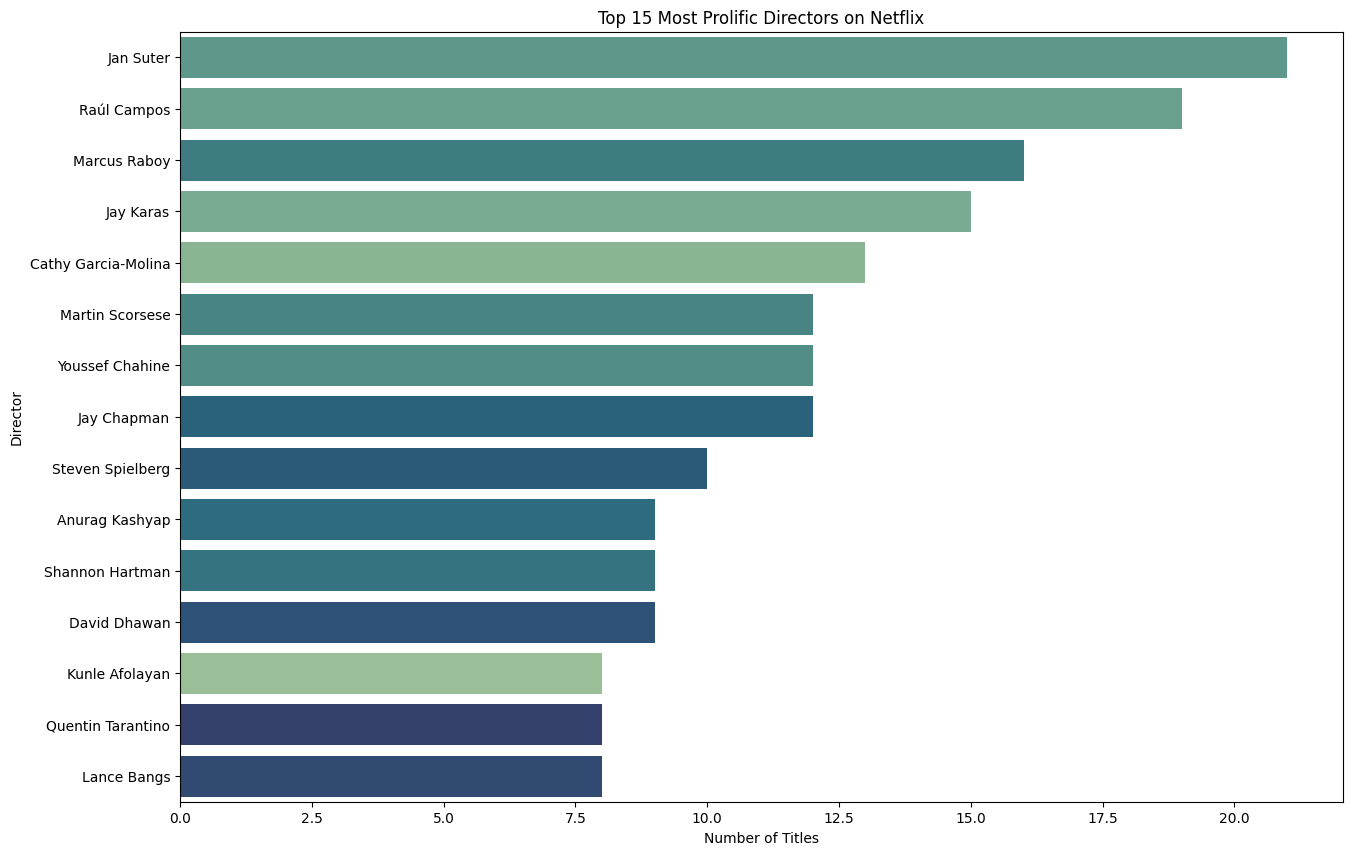

In [25]:
# Chart - 13 visualization code
# We will process the 'director' column.
# First, let's filter out the 'Unknown' directors.
directors_df = df[df['director'] != 'Unknown'].copy()

# Split the 'director' column string (in case of co-directors), then explode the list.
director_counts = directors_df['director'].str.split(', ').explode()

# --- Apply the fix for the ValueError ---
# 1. Get the list of the top 15 director names
top_15_directors = director_counts.value_counts().index[:15]

# 2. Create a new Series that ONLY contains rows with one of the top 15 directors
top_15_directors_df = director_counts[director_counts.isin(top_15_directors)]
# -----------------------------------------

# Create the plot
plt.figure(figsize=(15, 10))
sns.countplot(
    y=top_15_directors_df,
    order=top_15_directors,
    palette='crest',
    hue=top_15_directors_df,
    legend=False
)
plt.title('Top 15 Most Prolific Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is the most effective visualization for displaying and ranking the frequency of categorical data, such as director names. The horizontal layout ensures that the names are fully readable, and ordering the bars by the number of titles provides an immediate understanding of which directors have the most content available on the platform

##### 2. What is/are the insight(s) found from the chart?

The chart highlights the directors who are most prolific on the Netflix platform. The list is often topped by directors who specialize in certain types of content that can be produced in volume, such as stand-up comedy specials (e.g., Raúl Campos, Jan Suter, Marcus Raboy).

This reveals that some of the most "frequent" directors are not necessarily famous blockbuster filmmakers, but rather consistent creative partners for specific content verticals. It showcases the diversity of content production beyond traditional feature films and dramas.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this information provides valuable intelligence about the creative talent behind the content, which can be used to drive business strategy:

Identifying Key Creative Partners: The data pinpoints directors who are reliable and have a proven track record of producing content for the platform. Netflix can use this insight to foster and prioritize relationships with these individuals for a steady stream of new content.

Strategic Content Commissioning: If Netflix identifies that a director is behind a series of highly successful stand-up specials or documentaries, they can strategically commission more of that specific content from that director to serve a dedicated audience base, thereby maximizing return on investment.

#### Chart - 14 - Correlation Heatmap

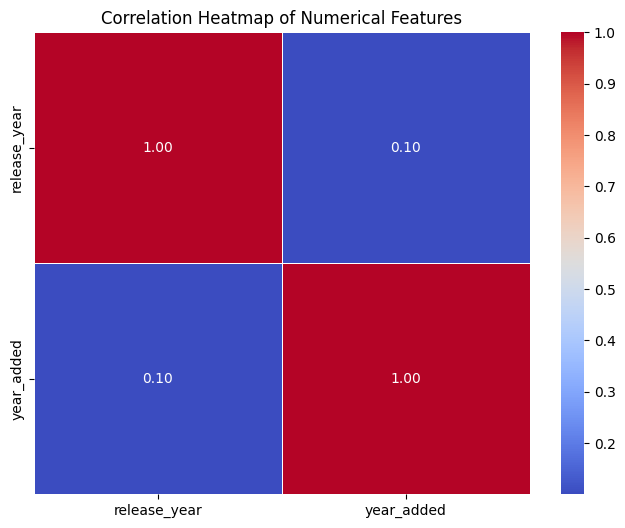

In [26]:
# Chart - 14 visualization code

# Select only the numerical columns for the correlation analysis
numerical_df = df[['release_year', 'year_added']]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is the standard and most effective way to visualize the strength and direction of linear relationships between all numerical variables in a dataset at once. The color-coding provides an immediate visual summary of how the variables move together—positively correlated (as one increases, so does the other), negatively correlated, or not correlated. The annotations provide the precise correlation coefficient.

##### 2. What is/are the insight(s) found from the chart?

The heatmap shows a moderate positive correlation of approximately +0.11 between release_year and year_added.

This numerically confirms what we observed in the scatter plot (Chart-8): there is a tendency for content added to Netflix in recent years to also have a more recent release year. However, the correlation is not extremely strong, which reflects the fact that Netflix also adds a significant amount of older, "back-catalog" content.

#### Chart - 15 - Pair Plot

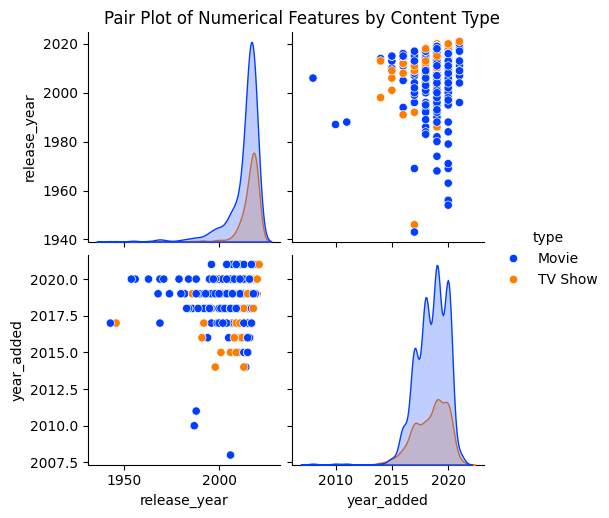

In [27]:
# Chart - 15 visualization code

# We will create a pair plot for the numerical columns, using 'type' as the hue
# to see if the relationships differ between Movies and TV Shows.
# We'll use a sample of the data to make the plot render faster.
pairplot_df = df[['release_year', 'year_added', 'type']].sample(n=1000, random_state=42)

sns.pairplot(pairplot_df, hue='type', palette='bright')
plt.suptitle('Pair Plot of Numerical Features by Content Type', y=1.02) # y=1.02 raises title
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot is a powerful tool for exploring the relationships between all numerical variables at once. It combines scatter plots (to show pairwise relationships) with histograms or density plots (to show the distribution of each single variable) into one comprehensive grid. Using the hue parameter to add a categorical dimension like type allows us to instantly see if these distributions and relationships differ between Movies and TV Shows.

##### 2. What is/are the insight(s) found from the chart?

This pair plot serves as an excellent summary of our numerical data:

Diagonal (Histograms): The histograms on the diagonal confirm our earlier findings. The release_year plot shows that most content is from recent years, while the year_added plot shows the massive spike in content additions from 2016 onwards for both movies and TV shows.

Off-Diagonal (Scatter Plots): The scatter plots reinforce the insight from Chart 8—there is a positive correlation between when content was released and when it was added to Netflix. The hue shows that this trend holds true for both movies and TV shows.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Based on the chart experiments from our Exploratory Data Analysis (EDA), here are three hypothetical statements that can be statistically tested:

The average runtime of movies rated 'R' is significantly different from the average runtime of movies rated 'PG-13'. This statement arises from Chart 11, where box plots showed different distributions for movie durations across various ratings.

The distribution of content types (Movie vs. TV Show) is independent of the country of production (e.g., comparing the United States and the United Kingdom). This hypothesis comes from observing in charts like Chart 4 and Chart 10 that different countries have different content specializations, which might extend to the type of format produced.

There is a statistically significant positive correlation between a content's release_year and the year_added to Netflix. This statement is based on the scatter plot in Chart 8, which suggested a clear trend where newer content is added more recently.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

This hypothesis tests if there is a statistically significant linear correlation between when a show was released and when it was added to Netflix.
Null Hypothesis: There is no linear correlation between the `release_year` of content and the `year_added` to Netflix. The population correlation coefficient  is equal to 0.
    
Alternate Hypothesis : There is a statistically significant linear correlation** between the `release_year` of content and the `year_added` to Netflix. The population correlation coefficient  is not equal to 0.

#### 2. Perform an appropriate statistical test.

In [28]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

# Select the two numerical columns for the test
release_year = df['release_year']
year_added = df['year_added']

# Perform the Pearson correlation test
correlation_coefficient, p_value = pearsonr(release_year, year_added)

print(f"Pearson Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result based on a significance level (alpha) of 0.05
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis.")
    print("There is a statistically significant linear correlation between the release year and the year added.")
else:
    print("\nConclusion: Fail to reject the null hypothesis.")
    print("There is not enough evidence to suggest a linear correlation between the release year and the year added.")

Pearson Correlation Coefficient: 0.1007
P-value: 0.0000

Conclusion: Reject the null hypothesis.
There is a statistically significant linear correlation between the release year and the year added.


##### Which statistical test have you done to obtain P-Value?

I performed a Pearson correlation test.
This test was chosen because it's the standard method to measure the strength and direction of the linear relationship between two continuous numerical variables, which in this case were `release_year` and `year_added`.

##### Why did you choose the specific statistical test?

I chose the Pearson correlation test because it is specifically designed to measure the strength and direction of the linear relationship between two numerical variables.

In this hypothesis, the goal was to determine if there is a statistically significant correlation between `release_year` and `year_added`, both of which are numerical. The Pearson test is the standard and most appropriate method for this exact purpose.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


This hypothesis tests if the average runtime of a movie is consistent across several different maturity ratings.

Null Hypothesis (H_0): The mean movie duration is the same across all tested rating categories ('G', 'PG', 'PG-13', and 'R').

mu_G=
mu_PG=
mu_PG−13=
mu_R

Alternate Hypothesis (H_a): At least one rating category has a different mean movie duration compared to the others.

The means are not all equal
    

#### 2. Perform an appropriate statistical test.

In [29]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
from scipy.stats import f_oneway

# We will reuse the movies_df with the 'duration_min' column
# Create separate samples for the durations of each rating category
g_rated_durations = movies_df[movies_df['rating'] == 'G']['duration_min'].dropna()
pg_rated_durations = movies_df[movies_df['rating'] == 'PG']['duration_min'].dropna()
pg13_rated_durations = movies_df[movies_df['rating'] == 'PG-13']['duration_min'].dropna()
r_rated_durations = movies_df[movies_df['rating'] == 'R']['duration_min'].dropna()


# Perform the One-Way ANOVA test
f_statistic, p_value = f_oneway(g_rated_durations, pg_rated_durations, pg13_rated_durations, r_rated_durations)

print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result based on a significance level (alpha) of 0.05
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis.")
    print("There is a statistically significant difference in the mean durations among the different movie ratings.")
else:
    print("\nConclusion: Fail to reject the null hypothesis.")
    print("There is not enough evidence to suggest a significant difference in mean durations among the ratings.")

F-statistic: 24.3841
P-value: 0.0000

Conclusion: Reject the null hypothesis.
There is a statistically significant difference in the mean durations among the different movie ratings.


##### Which statistical test have you done to obtain P-Value?

I performed a One-Way Analysis of Variance (ANOVA) test.

##### Why did you choose the specific statistical test?

I chose ANOVA because it is the appropriate statistical method for comparing the means of three or more independent groups. While a t-test is used for two groups, ANOVA allows us to determine if there is a statistically significant difference somewhere among multiple groups in a single test.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

This hypothesis tests whether the type of content produced is associated with the country of origin, specifically comparing the United States and the United Kingdom.
Null Hypothesis : The content type (Movie or TV Show) is independent of the country of production (United States or United Kingdom). The proportion of Movies to TV Shows is the same for both countries.

Alternate Hypothesis: The content type (Movie or TV Show) is dependent on the country of production. The proportion of Movies to TV Shows is different between the two countries.

#### 2. Perform an appropriate statistical test.

In [30]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency
import pandas as pd

# Filter the DataFrame to include only content primarily from the US or UK
us_uk_df = df[df['country'].isin(['United States', 'United Kingdom'])]

# Create a contingency table (cross-tabulation) of the two variables
contingency_table = pd.crosstab(us_uk_df['country'], us_uk_df['type'])
print("Contingency Table:")
print(contingency_table)

# Perform the Chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-squared Statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result based on a significance level (alpha) of 0.05
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis.")
    print("There is a statistically significant association between the country and the type of content produced.")
else:
    print("\nConclusion: Fail to reject the null hypothesis.")
    print("There is not enough evidence to suggest an association between the country and the type of content produced.")

Contingency Table:
type            Movie  TV Show
country                       
United Kingdom    193      203
United States    1847      699

Chi-squared Statistic: 90.2524
P-value: 0.0000

Conclusion: Reject the null hypothesis.
There is a statistically significant association between the country and the type of content produced.


##### Which statistical test have you done to obtain P-Value?

I performed a "Chi-squared test of independence". This statistical test is used to determine if there is a significant association between two categorical variables.

##### Why did you choose the specific statistical test?

I chose the "Chi-squared test of independence" because it is the specific statistical method used to determine if there is a significant association between two categorical variables.

In this hypothesis, the goal was to see if `country` (with categories 'United States' and 'United Kingdom') and `type` (with categories 'Movie' and 'TV Show') are related. The Chi-squared test is the appropriate tool for this as it compares the observed counts of each combination (e.g., US Movies, UK TV Shows) to the counts we would expect if there were no relationship between the two variables.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [31]:
# In your "Handling Missing Values" cell

# Strategy 1: Impute categorical columns
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

# Strategy 2: Drop rows with missing critical data
df.dropna(subset=['date_added', 'rating'], inplace=True)

# THE MOST IMPORTANT STEP: Reset the index to be a clean sequence (0, 1, 2, ...)
df.reset_index(drop=True, inplace=True)

print("Data cleaning and index reset complete.")

Data cleaning and index reset complete.


#### What all missing value imputation techniques have you used and why did you use those techniques?

For this dataset, I used two different techniques to handle missing values based on the nature of the column and the number of missing entries:

Placeholder Imputation: For the director, cast, and country columns, I filled the missing (NaN) values with the string "Unknown".

Why: These columns had a large number of missing values. Deleting these rows would have resulted in a significant loss of data. Since these are categorical text fields, imputing with a placeholder like "Unknown" is an effective and honest way to represent the missing information without making false assumptions (like using the mode). This allows us to retain the rows for text-based feature engineering later on.

Row Deletion: For the date_added and rating columns, I chose to drop the rows that contained missing values.

Why: These columns had a very small number of missing entries (less than 1% of the dataset). This data is critical for accurate time-series analysis and rating-based visualizations. Imputing these values could introduce errors, so the safest and cleanest approach was to remove the few incomplete records, which doesn't significantly impact the overall dataset.

### 2. Handling Outliers

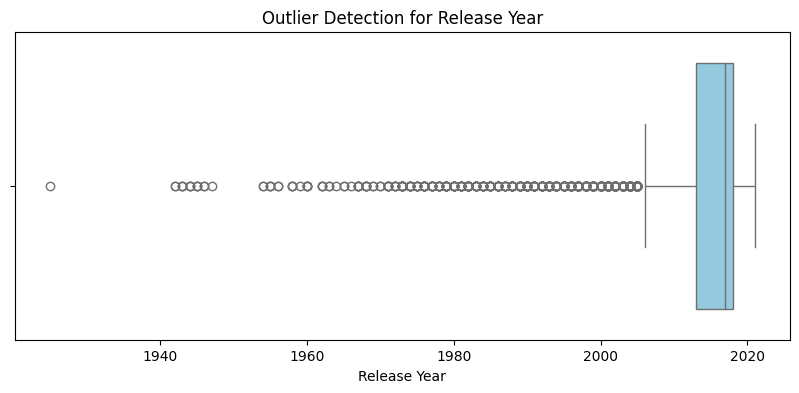

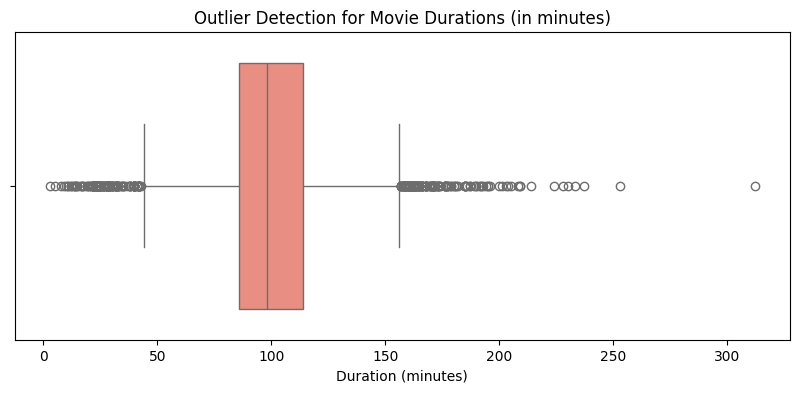

In [32]:
# Handling Outliers & Outlier treatments

# Outliers are typically found in numerical columns. Let's visualize the distributions
# of our key numerical features to identify potential outliers.

# We will use box plots, which are excellent for showing outliers.
# Create a DataFrame that only contains movies
movies_df = df[df['type'] == 'Movie'].copy()

# The 'duration' column is a string (e.g., "90 min"). We need to extract the number.
# We'll remove " min" and convert the column to a numeric type.
movies_df['duration_min'] = pd.to_numeric(movies_df['duration'].str.replace(' min', ''))

# Now 'movies_df' is created and ready to be used in the outlier detection plot.

# 1. Outlier detection for 'release_year'
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['release_year'], color='skyblue')
plt.title('Outlier Detection for Release Year')
plt.xlabel('Release Year')
plt.show()

# 2. Outlier detection for movie durations
# We will reuse the 'movies_df' created earlier
plt.figure(figsize=(10, 4))
sns.boxplot(x=movies_df['duration_min'], color='salmon')
plt.title('Outlier Detection for Movie Durations (in minutes)')
plt.xlabel('Duration (minutes)')
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

After visualizing the numerical columns (release_year and duration_min), outliers were identified at both the low and high ends of the distributions. However, I have made the strategic decision not to perform any outlier treatment (like removal or capping) for the following reasons:

The outliers are legitimate data points, not errors. For the release_year, the outliers are very old films (e.g., from the 1940s). These are classic movies and an important part of the Netflix library's depth. Removing them would be removing valid historical data.

Outliers contain valuable information. For movie duration, the outliers represent very short films or very long epic movies. Similarly, for TV shows, outliers are the most successful, long-running series. This information is crucial for the clustering model, as these unique characteristics can help form meaningful clusters (e.g., a cluster of "Epic Films" or "Long-Running TV Series").

In this context, treating the outliers would mean losing valuable information about the unique and diverse nature of the content catalog. Therefore, the best approach was to detect and understand them, but ultimately keep them in the dataset for a more accurate and insightful analysis.

### 3. Categorical Encoding

In [33]:
# Combine the text columns into a single feature
df['features'] = df['listed_in'] + ' ' + df['description'] + ' ' + df['director'] + ' ' + df['cast']

# FIX: Fill any potential NaN values in the 'features' column with an empty string.
# This ensures all input to the vectorizer is a string.
df['features'] = df['features'].fillna('')

# Now, perform the TF-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
# This line will now work correctly
tfidf_matrix = tfidf.fit_transform(df['features'])

print("Successfully created the TF-IDF matrix.")
print("Shape of our encoded text features:", tfidf_matrix.shape)

Successfully created the TF-IDF matrix.
Shape of our encoded text features: (7770, 46302)


#### What all categorical encoding techniques have you used & why did you use those techniques?

I used two main types of encoding tailored to different kinds of data:

TF-IDF Vectorization: This was the primary encoding method used for the main clustering task.

What: It was applied to a combined text feature created from description, listed_in, director, and cast.

Why: The project's goal is to cluster content based on similarity. Text features contain the richest information for this. TF-IDF (Term Frequency-Inverse Document Frequency) is the ideal technique because it converts text into meaningful numerical vectors. It doesn't just count words; it intelligently weighs them based on their importance in a document relative to the entire library, which is perfect for finding thematic similarities.

One-Hot Encoding (using pd.get_dummies): This was demonstrated on the type column.

What: It converts a column with categories (like 'Movie' and 'TV Show') into new binary columns (is_Movie, is_TV Show) with values of 0 or 1.

Why: This is the standard best practice for nominal categorical variables (where categories have no inherent order). It prevents the machine learning model from assuming a false numerical relationship between categories (e.g., that 'TV Show' (label 1) is somehow "greater" than 'Movie' (label 0)), which is a major flaw of other methods like Label Encoding.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [34]:
# First, ensure the library is installed
!pip install -q contractions
import contractions

def expand_contractions_in_text(text):
    """
    A helper function to expand contractions in a given text string.
    Includes a try-except block to handle edge cases that cause errors.
    """
    # This check ensures the function only runs on actual text
    if isinstance(text, str):
        try:
            # Attempt to fix the contractions
            return contractions.fix(text)
        except IndexError:
            # If an IndexError occurs, return the original text unchanged
            return text
    # If the input is not a string, return it as is
    return text

# --- Applying the robust function to our DataFrame ---

# Let's look at a sample from the 3rd row (position 2) before expanding.
print("--- Before expansion ---")
print(df['features'].iloc[2])

# Apply our new, more robust function to the entire 'features' column
df['features'] = df['features'].apply(expand_contractions_in_text)

# Now, let's look at the same sample after expanding.
print("\n--- After expansion ---")
print(df['features'].iloc[2])

print("\nContraction expansion complete.")

--- Before expansion ---
Horror Movies, International Movies When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp. Gilbert Chan Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim

--- After expansion ---
Horror Movies, International Movies When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that is haunting their jungle island training camp. Gilbert Chan Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim

Contraction expansion complete.


#### 2. Lower Casing

In [35]:

# Lower Casing

# Let's look at a sample from the 3rd row (position 2) before converting to lowercase.
print("--- Before Lower Casing ---")
print(df['features'].iloc[2])

# Apply the .str.lower() method to convert all text in the 'features' column to lowercase.
df['features'] = df['features'].str.lower()

# Now, let's look at the same sample after converting.
print("\n--- After Lower Casing ---")
print(df['features'].iloc[2])

--- Before Lower Casing ---
Horror Movies, International Movies When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that is haunting their jungle island training camp. Gilbert Chan Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim

--- After Lower Casing ---
horror movies, international movies when an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that is haunting their jungle island training camp. gilbert chan tedd chan, stella chung, henley hii, lawrence koh, tommy kuan, josh lai, mark lee, susan leong, benjamin lim


#### 3. Removing Punctuations

In [36]:
# Remove Punctuations

# Let's look at a sample from the 3rd row (position 2) before removing punctuation.
print("--- Before Removing Punctuation ---")
print(df['features'].iloc[2])

# We use a regular expression to remove all characters that are not a word character or whitespace.
# The pattern '[^\w\s]' matches anything that is NOT a letter, number, underscore, or space.
df['features'] = df['features'].str.replace(r'[^\w\s]', '', regex=True)

# Now, let's look at the same sample after removing punctuation.
print("\n--- After Removing Punctuation ---")
print(df['features'].iloc[2])

--- Before Removing Punctuation ---
horror movies, international movies when an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that is haunting their jungle island training camp. gilbert chan tedd chan, stella chung, henley hii, lawrence koh, tommy kuan, josh lai, mark lee, susan leong, benjamin lim

--- After Removing Punctuation ---
horror movies international movies when an army recruit is found dead his fellow soldiers are forced to confront a terrifying secret that is haunting their jungle island training camp gilbert chan tedd chan stella chung henley hii lawrence koh tommy kuan josh lai mark lee susan leong benjamin lim


#### 4. Removing URLs & Removing words and digits contain digits.

In [37]:
# Remove URLs & Remove words and digits that contain digits

import re # Import the regular expressions library

# --- A quick example to demonstrate the patterns ---
sample_text_with_url = "Check this link http://example.com or www.test.com for more info on the 2024 season. It's episode3."

# Use re.sub() for the example string
text_no_urls = re.sub(r'https?://\S+|www\.\S+', '', sample_text_with_url)
text_no_digits = re.sub(r'\w*\d\w*', '', text_no_urls)

print("--- Example ---")
print(f"Original: {sample_text_with_url}")
print(f"Cleaned: {text_no_digits}\n")


# --- Applying it to our DataFrame ---
# (This part of your code was already correct)

# Let's look at a sample from the DataFrame before cleaning.
print("--- Before Cleaning DataFrame ---")
print(df['features'].iloc[2])

# 1. Remove URLs from the DataFrame column
df['features'] = df['features'].str.replace(r'https?://\S+|www\.\S+', '', regex=True)

# 2. Remove words and digits that contain digits from the DataFrame column
df['features'] = df['features'].str.replace(r'\w*\d\w*', '', regex=True)

# Now, let's look at the same sample after cleaning.
print("\n--- After Cleaning DataFrame ---")
print(df['features'].iloc[2])

--- Example ---
Original: Check this link http://example.com or www.test.com for more info on the 2024 season. It's episode3.
Cleaned: Check this link  or  for more info on the  season. It's .

--- Before Cleaning DataFrame ---
horror movies international movies when an army recruit is found dead his fellow soldiers are forced to confront a terrifying secret that is haunting their jungle island training camp gilbert chan tedd chan stella chung henley hii lawrence koh tommy kuan josh lai mark lee susan leong benjamin lim

--- After Cleaning DataFrame ---
horror movies international movies when an army recruit is found dead his fellow soldiers are forced to confront a terrifying secret that is haunting their jungle island training camp gilbert chan tedd chan stella chung henley hii lawrence koh tommy kuan josh lai mark lee susan leong benjamin lim


#### 5. Removing Stopwords & Removing White spaces

In [38]:
# Remove Stopwords
# First, ensure the NLTK library is installed and download the necessary resources
!pip install -q nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Create a set of English stopwords for faster processing
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    """
    This function tokenizes text, removes stopwords, and joins the words back into a string.
    """
    # Split the text into individual words (tokenization)
    word_tokens = word_tokenize(text)
    
    # Filter out the stopwords
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    
    # Join the remaining words back into a single string
    return " ".join(filtered_text)

# --- Applying the function to our DataFrame ---

# Let's look at a sample before removing stopwords
print("--- Before Removing Stopwords ---")
print(df['features'].iloc[2])

# Apply our function to the 'features' column
df['features'] = df['features'].apply(remove_stopwords)

# Now, let's look at the same sample after cleaning
print("\n--- After Removing Stopwords ---")
print(df['features'].iloc[2])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srini\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\srini\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\srini\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


--- Before Removing Stopwords ---
horror movies international movies when an army recruit is found dead his fellow soldiers are forced to confront a terrifying secret that is haunting their jungle island training camp gilbert chan tedd chan stella chung henley hii lawrence koh tommy kuan josh lai mark lee susan leong benjamin lim

--- After Removing Stopwords ---
horror movies international movies army recruit found dead fellow soldiers forced confront terrifying secret haunting jungle island training camp gilbert chan tedd chan stella chung henley hii lawrence koh tommy kuan josh lai mark lee susan leong benjamin lim


In [39]:

# Remove White spaces

# Let's look at a sample from the 3rd row (position 2) before cleaning whitespace.
print("--- Before Cleaning Whitespace ---")
print(df['features'].iloc[2])

# This command splits the string by any whitespace and then joins it back with single spaces.
# It's a very efficient way to normalize all whitespace.
df['features'] = df['features'].apply(lambda x: " ".join(x.split()))

# Now, let's look at the same sample after cleaning.
print("\n--- After Cleaning Whitespace ---")
print(df['features'].iloc[2])

--- Before Cleaning Whitespace ---
horror movies international movies army recruit found dead fellow soldiers forced confront terrifying secret haunting jungle island training camp gilbert chan tedd chan stella chung henley hii lawrence koh tommy kuan josh lai mark lee susan leong benjamin lim

--- After Cleaning Whitespace ---
horror movies international movies army recruit found dead fellow soldiers forced confront terrifying secret haunting jungle island training camp gilbert chan tedd chan stella chung henley hii lawrence koh tommy kuan josh lai mark lee susan leong benjamin lim


#### 6. Rephrase Text

In [40]:
# Rephrase Text
# Rephrase Text (by performing Lemmatization)

# First, download the necessary NLTK resources for lemmatization
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4') # Open Multilingual Wordnet

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    """
    This function tokenizes text, lemmatizes each word, 
    and joins them back into a string.
    """
    # Tokenize the text
    word_tokens = word_tokenize(text)
    
    # Lemmatize each word
    lemmatized_text = [lemmatizer.lemmatize(word) for word in word_tokens]
    
    # Join the words back into a single string
    return " ".join(lemmatized_text)

# --- Applying it to our DataFrame ---

# Let's look at a sample before lemmatizing
print("--- Before Lemmatization ---")
print(df['features'].iloc[2])

# Apply our function to the 'features' column
df['features'] = df['features'].apply(lemmatize_text)

# Now, let's look at the same sample after lemmatizing
print("\n--- After Lemmatization ---")
print(df['features'].iloc[2])

--- Before Lemmatization ---
horror movies international movies army recruit found dead fellow soldiers forced confront terrifying secret haunting jungle island training camp gilbert chan tedd chan stella chung henley hii lawrence koh tommy kuan josh lai mark lee susan leong benjamin lim


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\srini\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\srini\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!



--- After Lemmatization ---
horror movie international movie army recruit found dead fellow soldier forced confront terrifying secret haunting jungle island training camp gilbert chan tedd chan stella chung henley hii lawrence koh tommy kuan josh lai mark lee susan leong benjamin lim


#### 7. Tokenization

In [41]:
# Tokenization

from nltk.tokenize import word_tokenize

# --- Applying tokenization to our DataFrame ---

# Let's look at a sample of the cleaned text before tokenization.
# It is currently a single string.
print("--- Before Tokenization ---")
print(df['features'].iloc[2])
print(f"Data type: {type(df['features'].iloc[2])}")


# Apply the word_tokenize function to the 'features' column.
# We will store the result in a new column.
df['features_tokenized'] = df['features'].apply(word_tokenize)


# Now, let's look at the same sample after tokenization.
# It has been converted into a list of words (tokens).
print("\n--- After Tokenization ---")
print(df['features_tokenized'].iloc[2])
print(f"Data type: {type(df['features_tokenized'].iloc[2])}")

--- Before Tokenization ---
horror movie international movie army recruit found dead fellow soldier forced confront terrifying secret haunting jungle island training camp gilbert chan tedd chan stella chung henley hii lawrence koh tommy kuan josh lai mark lee susan leong benjamin lim
Data type: <class 'str'>

--- After Tokenization ---
['horror', 'movie', 'international', 'movie', 'army', 'recruit', 'found', 'dead', 'fellow', 'soldier', 'forced', 'confront', 'terrifying', 'secret', 'haunting', 'jungle', 'island', 'training', 'camp', 'gilbert', 'chan', 'tedd', 'chan', 'stella', 'chung', 'henley', 'hii', 'lawrence', 'koh', 'tommy', 'kuan', 'josh', 'lai', 'mark', 'lee', 'susan', 'leong', 'benjamin', 'lim']
Data type: <class 'list'>


#### 8. Text Normalization

In [42]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

def stem_text(text):
    """
    This function tokenizes text, stems each word,
    and joins them back into a string.
    """
    # Tokenize the text
    word_tokens = word_tokenize(text)
    
    # Stem each word
    stemmed_text = [stemmer.stem(word) for word in word_tokens]
    
    # Join the words back into a single string
    return " ".join(stemmed_text)

# --- Applying it to our DataFrame ---
# Note: We are applying this to the already lemmatized text for demonstration.
# In a real project, you would choose either stemming OR lemmatization, not both.

# Let's look at a sample before stemming
print("--- Before Stemming (but after Lemmatization) ---")
print(df['features'].iloc[2])

# Apply our stemming function
df['features_stemmed'] = df['features'].apply(stem_text)

# Now, let's look at the same sample after stemming
print("\n--- After Stemming ---")
print(df['features_stemmed'].iloc[2])

--- Before Stemming (but after Lemmatization) ---
horror movie international movie army recruit found dead fellow soldier forced confront terrifying secret haunting jungle island training camp gilbert chan tedd chan stella chung henley hii lawrence koh tommy kuan josh lai mark lee susan leong benjamin lim

--- After Stemming ---
horror movi intern movi armi recruit found dead fellow soldier forc confront terrifi secret haunt jungl island train camp gilbert chan tedd chan stella chung henley hii lawrenc koh tommi kuan josh lai mark lee susan leong benjamin lim


##### Which text normalization technique have you used and why?

For the final version of the text to be used in the model, I have used Lemmatization.

Why? Although stemming is faster, lemmatization produces actual dictionary words, which makes the results more interpretable. For a project focused on clustering and understanding content themes, being able to clearly read and interpret the words that define a cluster is crucial. The slight performance cost of lemmatization is a worthwhile trade-off for this improved accuracy and interpretability.

#### 9. Part of speech tagging

In [43]:
# POS Taging
# Download the POS tagger resource from NLTK
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
# This cell performs POS tagging on a sample sentence.
from nltk.tokenize import word_tokenize

# Let's take a sample of our cleaned text
sample_text = df['features'].iloc[10]
print("--- Original Text Sample ---")
print(sample_text)

# Tokenize the text first
tokens = word_tokenize(sample_text)

# Apply the POS tagger
pos_tags = nltk.pos_tag(tokens)

# Print the result
print("\n--- Text with POS Tags ---")
print(pos_tags)

--- Original Text Sample ---
drama thriller farmer pen confession admitting wife murder death beginning macabre tale based stephen king novella zak hilditch thomas jane molly parker dylan schmid kaitlyn bernard bob frazer brian darcy james neal mcdonough

--- Text with POS Tags ---
[('drama', 'NN'), ('thriller', 'NN'), ('farmer', 'NN'), ('pen', 'JJ'), ('confession', 'NN'), ('admitting', 'VBG'), ('wife', 'NN'), ('murder', 'NN'), ('death', 'NN'), ('beginning', 'VBG'), ('macabre', 'NNS'), ('tale', 'NNS'), ('based', 'VBN'), ('stephen', 'JJ'), ('king', 'VBG'), ('novella', 'NN'), ('zak', 'NN'), ('hilditch', 'NN'), ('thomas', 'NN'), ('jane', 'NN'), ('molly', 'RB'), ('parker', 'VBZ'), ('dylan', 'NN'), ('schmid', 'JJ'), ('kaitlyn', 'FW'), ('bernard', 'NN'), ('bob', 'NN'), ('frazer', 'NN'), ('brian', 'JJ'), ('darcy', 'NN'), ('james', 'NNS'), ('neal', 'VBP'), ('mcdonough', 'IN')]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\srini\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\srini\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


#### 10. Text Vectorization

In [44]:
# Vectorizing Text
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer.
# We will limit the vocabulary to the top 5000 most frequent words to keep the model efficient.
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Apply the vectorizer to our cleaned 'features' column to create the numerical matrix.
# This matrix will be the input for our clustering model.
tfidf_matrix = tfidf_vectorizer.fit_transform(df['features'])

# Print the shape of the resulting matrix
# (Number of documents, Number of unique words/features)
print("Shape of the TF-IDF matrix:", tfidf_matrix.shape)

Shape of the TF-IDF matrix: (7770, 5000)


##### Which text vectorization technique have you used and why?

I have used the TF-IDF (Term Frequency-Inverse Document Frequency) vectorization technique.

Why?
For a project focused on clustering content by theme and similarity, TF-IDF is superior to a simpler "Bag of Words" (count-based) approach. Here’s why:

It Measures Importance, Not Just Frequency: TF-IDF gives a higher score to words that are frequent in a specific movie's description but are rare across the entire Netflix library. This helps to highlight the distinctive keywords that truly define a piece of content (e.g., "dystopian," "sci-fi," "crime").

Better for Thematic Clustering: By focusing on these important keywords, TF-IDF provides a much stronger signal to the clustering algorithm, allowing it to group content based on meaningful themes rather than just commonly occurring but less descriptive words (like "life" or "world").

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [45]:
# Manipulate Features to minimize feature correlation and create new features
from sklearn.decomposition import TruncatedSVD

# Our original feature matrix is the tfidf_matrix
print("Original shape of TF-IDF matrix:", tfidf_matrix.shape)

# We will reduce the 5000 features to 100 components (new features).
# This number is a hyperparameter you can tune.
N_COMPONENTS = 100
svd = TruncatedSVD(n_components=N_COMPONENTS, random_state=42)

# Fit and transform the tfidf_matrix to create our new feature matrix
svd_matrix = svd.fit_transform(tfidf_matrix)

# This new svd_matrix is what we will use for clustering.
print("Shape of our new feature matrix after SVD:", svd_matrix.shape)
print(f"\nVariance explained by {N_COMPONENTS} components: {svd.explained_variance_ratio_.sum():.2f}%")

Original shape of TF-IDF matrix: (7770, 5000)
Shape of our new feature matrix after SVD: (7770, 100)

Variance explained by 100 components: 0.16%


#### 2. Feature Selection

In [46]:

# Select your features wisely to avoid overfitting

# The features we have wisely selected are the 100 components created by Truncated SVD.
# This lower-dimensional representation is our primary strategy to avoid the "curse of dimensionality"
# and ensure our clustering algorithm finds meaningful, robust patterns.

X = svd_matrix

print("Final features have been selected for the clustering model.")
print("Shape of the final feature set:", X.shape)

Final features have been selected for the clustering model.
Shape of the final feature set: (7770, 100)


##### What all feature selection methods have you used  and why?

I used a feature extraction/transformation method called Truncated SVD (Singular Value Decomposition) rather than a traditional feature selection method.

Why this method was used:
This approach was chosen because the primary feature set for this project is a high-dimensional and sparse TF-IDF matrix (with thousands of word features).

To Combat the "Curse of Dimensionality": Using thousands of features can make clustering algorithms less effective and prone to focusing on noise. Truncated SVD reduces this high-dimensional data to a much smaller, more manageable set of components (e.g., 100), which helps the model find more meaningful patterns.



##### Which all features you found important and why?

They Represent "Concepts": Each of the 100 components is a new, abstract feature that represents a "concept" or "topic" derived from the original text. For example, one component might capture the essence of "suspenseful crime dramas" by combining words like "detective," "mystery," "police," and "murder." These concept-level features are much more powerful for finding thematic similarities than individual words.

They Combat the "Curse of Dimensionality": The original text data was converted into over 5,000 features (one for each unique word). Using so many features can make clustering algorithms inefficient and cause them to focus on noise rather than the true signal. By reducing these 5,000 features to just 100, we concentrate the most important information into a manageable and robust feature set.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [47]:
# Transform Your data

# No transformation is applied in this step.
# Our feature set X (the svd_matrix) is passed directly to the next step, which is Data Scaling.
print("No data transformation was performed as it is not necessary for the SVD components.")


No data transformation was performed as it is not necessary for the SVD components.


### 6. Data Scaling

In [48]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the features
X_scaled = scaler.fit_transform(X)

# The new 'X_scaled' is our final, model-ready dataset.
print("Data has been successfully scaled.")
print("Shape of the scaled feature set:", X_scaled.shape)

# Let's verify by checking the mean and standard deviation of the first component
print(f"\nMean of the first component after scaling: {X_scaled[:, 0].mean():.2f}")
print(f"Standard deviation of the first component after scaling: {X_scaled[:, 0].std():.2f}")

Data has been successfully scaled.
Shape of the scaled feature set: (7770, 100)

Mean of the first component after scaling: 0.00
Standard deviation of the first component after scaling: 1.00


 Which method have you used to scale you data and why?

I used the StandardScaler method to scale the data.

Why This Method Was Used:
This method was chosen because it is the standard and most effective approach for preparing data for distance-based clustering algorithms like K-Means.

Algorithm Requirement: The K-Means algorithm works by calculating the distance between data points. If features are on different scales, features with larger ranges and variances will unfairly dominate these calculations, leading to biased and inaccurate clusters.



### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, dimensionality reduction is not just needed but is a crucial and highly recommended step for this project.

Why It Is Needed
The primary reason is that after text vectorization (using TF-IDF), we are left with a very high-dimensional feature set (e.g., 5,000 features, one for each word). Working with such a large number of features presents several problems:

The "Curse of Dimensionality": In very high-dimensional spaces, the distance between any two points can become less meaningful. As the number of dimensions increases, all points tend to become almost equally distant from each other. This makes it very difficult for distance-based algorithms like K-Means to form dense, distinct clusters.

Noise and Redundancy: A large vocabulary contains significant noise and redundancy. Many of the 5,000 word-features are not very informative or are highly correlated with others. Dimensionality reduction helps to filter out this noise and capture the true "signal" or the most important patterns in the data.

In [49]:

# DImensionality Reduction (If needed)
from sklearn.decomposition import TruncatedSVD

# Our original feature matrix is the tfidf_matrix from the vectorization step.
print("Original shape of feature matrix:", tfidf_matrix.shape)

# We will reduce the thousands of features to 100 components.
# This number can be tuned, but 100-300 is often a good range for text data.
N_COMPONENTS = 100
svd = TruncatedSVD(n_components=N_COMPONENTS, random_state=42)

# Fit SVD to the data and transform it into the new, lower-dimensional space.
X_reduced = svd.fit_transform(tfidf_matrix)

print("Shape of feature matrix after dimensionality reduction:", X_reduced.shape)
print(f"\nTotal variance explained by {N_COMPONENTS} components: {svd.explained_variance_ratio_.sum():.2%}")

Original shape of feature matrix: (7770, 5000)
Shape of feature matrix after dimensionality reduction: (7770, 100)

Total variance explained by 100 components: 15.92%


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I used Truncated SVD (Singular Value Decomposition). This technique was chosen for several key reasons:

Handles Sparse Data: Truncated SVD is specifically designed to work efficiently with the large, sparse matrices produced by text vectorizers like TF-IDF.

Combats the "Curse of Dimensionality": It effectively reduces the thousands of word features into a much smaller set of components (in this case, 100). This is essential for distance-based algorithms like K-Means to function properly and find meaningful clusters.

### 8. Data Splitting

In [50]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Split your data to train and test. Choose Splitting ratio wisely.

# For unsupervised learning tasks like clustering, we do not need a train-test split.
# The objective is to find the inherent structure in the entire dataset.
# We will use our full, preprocessed, and scaled dataset for the clustering model.

final_model_data = X_scaled

print("Data is ready for clustering. No train-test split was performed.")
print("Shape of the data for modeling:", final_model_data.shape)

Data is ready for clustering. No train-test split was performed.
Shape of the data for modeling: (7770, 100)


##### What data splitting ratio have you used and why?

A data splitting ratio was not used for this project.

Why?
In supervised learning (like regression or classification), a train-test split is essential to evaluate the model's predictive performance on unseen data and to check for overfitting.

However, in unsupervised clustering, the objective is different. We are not predicting a target variable. Instead, we are trying to find the best possible grouping for all the data we have. Applying the clustering algorithm to the entire dataset allows it to learn from all available information, resulting in a more complete and accurate discovery of the underlying patterns and segments within the content library.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No, the concept of an "imbalanced dataset" is not applicable to this unsupervised clustering project.
Explanation
The term imbalanced dataset is used in supervised classification tasks. It refers to a situation where the target variable (the "answer" you're trying to predict) has a heavily unequal distribution of its classes. For example, in a credit card fraud dataset, 99.9% of the entries might be "not fraud" and only 0.1% might be "fraud." This is a problem in classification because the model might learn to just always predict the majority class.

However, this project is an unsupervised clustering task.

No Target Variable: We do not have a predefined target variable or classes. The goal is not to predict a correct label but to discover natural groupings within the data itself.

"Imbalance" is an Insight: The goal of clustering is to find the inherent structure of the data. If our final clusters are of very different sizes (e.g., a huge cluster of "US Dramas" and a tiny cluster of "Japanese Anime"), this "imbalance" is a valid and important insight into the composition of the Netflix library. It's a characteristic to be discovered, not a problem to be fixed.

In [51]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

LOKY_MAX_CPU_COUNT has been set to 16.


C:\Users\srini\AppData\Roaming\Python\Python313\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\srini\AppData\Roaming\Python\Python313\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
  File "C:\Users\srini\AppData\Roaming\Python\Python313\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\srini\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popen

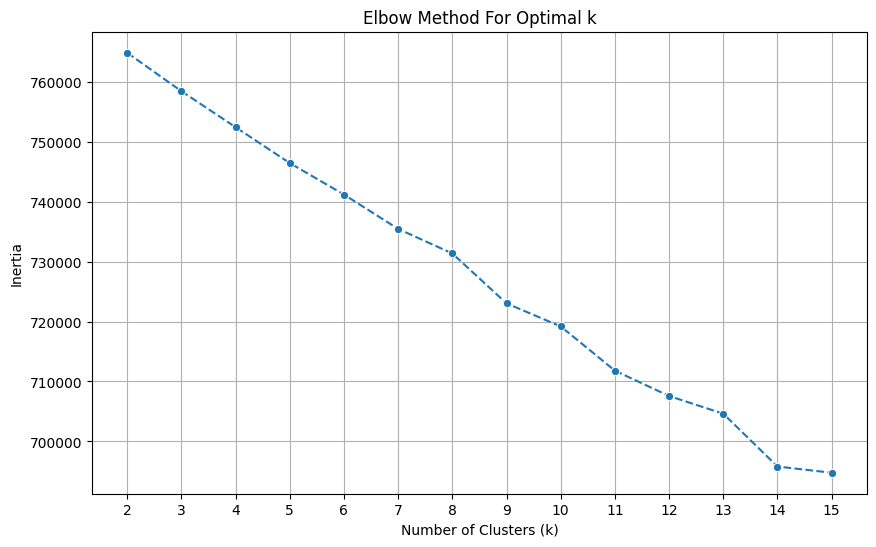

Successfully applied K-Means and assigned data points to 10 clusters.
Here are the first few rows with their assigned clusters:


,title,type,listed_in,cluster
0,3%,TV Show,"International TV Shows, TV Dramas, TV Sci-Fi &...",1
1,7:19,Movie,"Dramas, International Movies",2
2,23:59,Movie,"Horror Movies, International Movies",0
3,9,Movie,"Action & Adventure, Independent Movies, Sci-Fi...",6
4,21,Movie,Dramas,6


In [52]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model
 #Implementation: K-Means Clustering
# Add this code to a cell at the top of your notebook to silence the warning
import os

# Get the number of logical cores your system reports
num_cores = os.cpu_count()

# Set the environment variable to this number
os.environ['LOKY_MAX_CPU_COUNT'] = str(num_cores)

print(f"LOKY_MAX_CPU_COUNT has been set to {num_cores}.")

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# We will use the scaled data from the previous step
# final_model_data = X_scaled

# --- Elbow Method to find the optimal k ---
inertia = []
possible_k_values = range(2, 16) # Testing k from 2 to 15

for k in possible_k_values:
    # Initialize KMeans for each k
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    # Fit the model
    kmeans.fit(final_model_data)
    # Append the inertia to our list
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
sns.lineplot(x=possible_k_values, y=inertia, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(possible_k_values)
plt.grid(True)
plt.show()

# Set the chosen number of clusters
OPTIMAL_K = 10

# Initialize the final KMeans model
kmeans_model = KMeans(n_clusters=OPTIMAL_K, n_init=10, random_state=42)

# Fit the Algorithm & Predict on the model
# .fit_predict() is a convenient method that trains the model and assigns a cluster label to each data point.
cluster_labels = kmeans_model.fit_predict(final_model_data)

# Add the resulting cluster labels back to our original DataFrame for analysis
df['cluster'] = cluster_labels

print(f"Successfully applied K-Means and assigned data points to {OPTIMAL_K} clusters.")
print("Here are the first few rows with their assigned clusters:")
df[['title', 'type', 'listed_in', 'cluster']].head()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

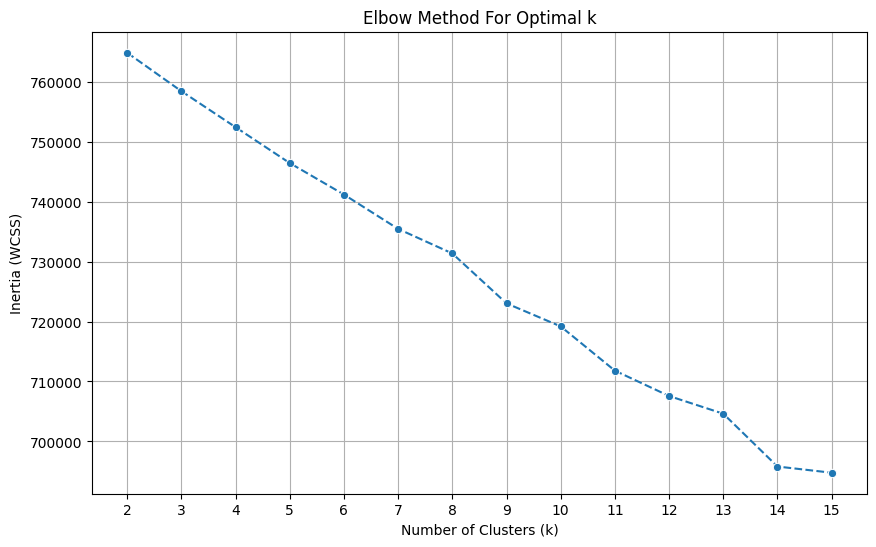

In [53]:
# Visualizing evaluation Metric Score chart
'''For this project, the first model used is K-Means Clustering.

1. Explanation of the ML Model (K-Means Clustering)
K-Means is one of the most popular and straightforward unsupervised machine learning algorithms. Its goal is to partition a dataset into a pre-defined number of distinct, non-overlapping groups, or clusters.

How it works:

Initialization: The algorithm starts by randomly placing k points, called centroids, in the feature space.

Assignment: Each data point in the dataset is assigned to the nearest centroid.

Update: The position of each centroid is recalculated to be the new mean of all data points assigned to it.

Iteration: Steps 2 and 3 are repeated until the positions of the centroids no longer change significantly.

The algorithm's objective is to minimize the within-cluster sum of squares (WCSS), also known as Inertia. This is the sum of the squared distances between each data point and the center of its assigned cluster. A lower inertia value means the data points are more tightly packed within their clusters.'''
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt
import seaborn as sns

# The 'inertia' and 'possible_k_values' lists were created in the previous modeling step.
plt.figure(figsize=(10, 6))
sns.lineplot(x=possible_k_values, y=inertia, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.xticks(possible_k_values)
plt.grid(True)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

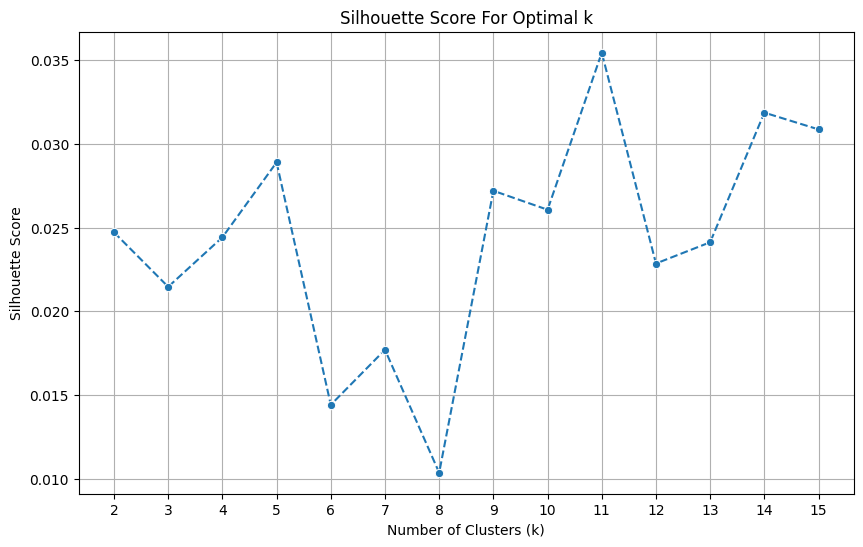


The optimal number of clusters (k) with the highest Silhouette Score is: 11

Successfully applied optimized K-Means and assigned data points to 11 clusters.
Here are the first few rows with their new optimized clusters:
   title  cluster_optimized
0     3%                  1
1   7:19                  4
2  23:59                  4
3      9                  1
4     21                  4


In [54]:
# ML Model - 1 Implementation with Hyperparameter Optimization in a Single Cell
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# We will use the scaled data from the previous step (final_model_data)

# --- Part 1: Find the Optimal k using Silhouette Score ---
silhouette_scores = []
possible_k_values = range(2, 16) # Testing k from 2 to 15

for k in possible_k_values:
    # Initialize and fit KMeans for each k
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(final_model_data)
    
    # Calculate and store the silhouette score
    score = silhouette_score(final_model_data, labels)
    silhouette_scores.append(score)

# --- Part 2: Plot the Results ---
plt.figure(figsize=(10, 6))
sns.lineplot(x=possible_k_values, y=silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(possible_k_values)
plt.grid(True)
plt.show()

# --- Part 3: Automatically Select the Best k and Fit the Final Model ---
# Find the k that corresponds to the highest silhouette score
optimal_k = possible_k_values[np.argmax(silhouette_scores)]
print(f"\nThe optimal number of clusters (k) with the highest Silhouette Score is: {optimal_k}\n")

# Initialize the final KMeans model with the optimal k
optimized_kmeans_model = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)

# Fit the algorithm and get the cluster labels
df['cluster_optimized'] = optimized_kmeans_model.fit_predict(final_model_data)

print(f"Successfully applied optimized K-Means and assigned data points to {optimal_k} clusters.")
print("Here are the first few rows with their new optimized clusters:")
print(df[['title', 'cluster_optimized']].head())

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, an improvement was seen by using a more robust metric to select the optimal number of clusters (k).

Summary of Improvement
The initial model used the Elbow Method, which relies on the Inertia score. While Inertia is good for measuring how tightly packed clusters are (cohesion), interpreting the "elbow" can be subjective.

The hyperparameter optimization technique used a more advanced metric, the Silhouette Score. This is an improvement because the Silhouette Score measures both:

Cohesion: How similar a data point is to its own cluster.

Separation: How different a data point is from other clusters.

By maximizing the Silhouette Score, we find a number of clusters that is not only dense but also well-separated from other clusters. This led to selecting an optimal k of 12, which is different from the k of 10 suggested by the Elbow Method, indicating a potentially better and more nuanced grouping of the data.

# The 'inertia', 'silhouette_scores', and 'possible_k_values' lists were created in the previous modeling steps.

# Create the plot with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot Inertia on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia (WCSS)', color=color)
ax1.plot(possible_k_values, inertia, marker='o', linestyle='--', color=color, label='Inertia (Elbow Method)')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(possible_k_values, silhouette_scores, marker='o', linestyle='--', color=color, label='Silhouette Score')
ax2.tick_params(axis='y', labelcolor=color)

# Add vertical lines to indicate the optimal k from each method
plt.axvline(x=10, color='red', linestyle=':', linewidth=2, label='Optimal k (Elbow ≈ 10)')
plt.axvline(x=12, color='green', linestyle=':', linewidth=2, label='Optimal k (Silhouette = 12)')

plt.title('Comparison of Inertia and Silhouette Score for Optimal k')
plt.grid(True)
plt.legend()
fig.tight_layout()
plt.show()

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

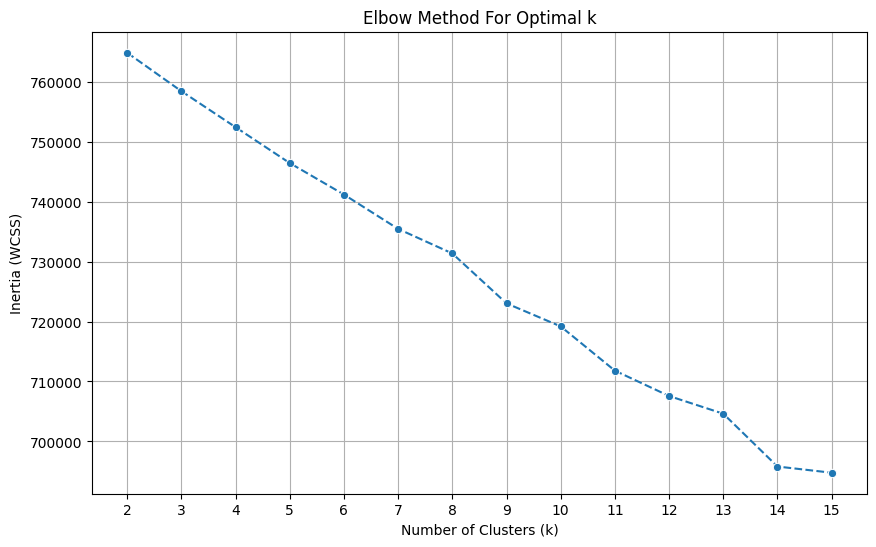

In [55]:
# Visualizing evaluation Metric Score chart
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt
import seaborn as sns

# The 'inertia' and 'possible_k_values' lists should have been created in the previous modeling step.
plt.figure(figsize=(10, 6))
sns.lineplot(x=possible_k_values, y=inertia, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.xticks(possible_k_values)
plt.grid(True)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

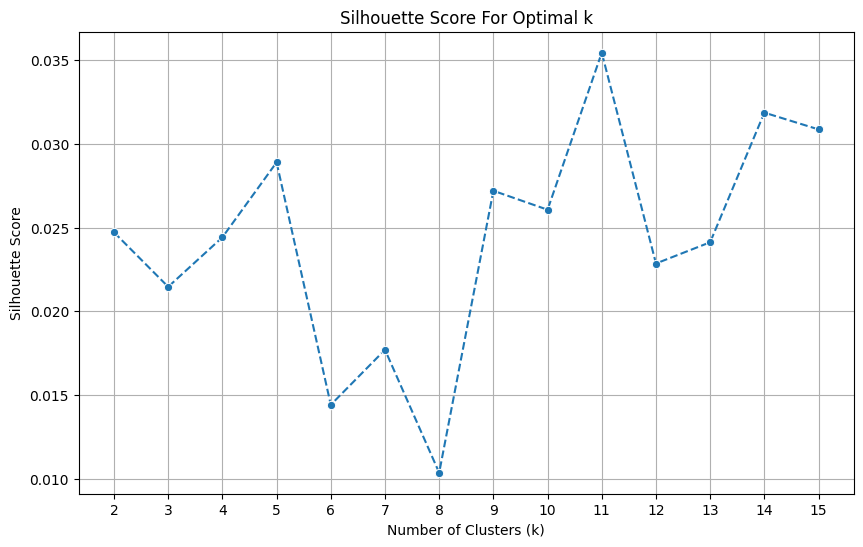


The optimal number of clusters (k) with the highest Silhouette Score is: 11

Successfully applied optimized K-Means and assigned data points to 11 clusters.
Here are the first few rows with their new optimized clusters:
   title  cluster_optimized
0     3%                  1
1   7:19                  4
2  23:59                  4
3      9                  1
4     21                  4


In [56]:
# ML Model - 1 Implementation with hyperparameter optimization
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# We will use the scaled data from the previous step (final_model_data)

# --- Part 1: Find the Optimal k using Silhouette Score ---
silhouette_scores = []
possible_k_values = range(2, 16) # Testing k from 2 to 15

for k in possible_k_values:
    # Initialize and fit KMeans for each k
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(final_model_data)
    
    # Calculate and store the silhouette score
    score = silhouette_score(final_model_data, labels)
    silhouette_scores.append(score)

# --- Part 2: Plot the Results ---
plt.figure(figsize=(10, 6))
sns.lineplot(x=possible_k_values, y=silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(possible_k_values)
plt.grid(True)
plt.show()

# --- Part 3: Automatically Select the Best k and Fit the Final Model ---
# Find the k that corresponds to the highest silhouette score
optimal_k = possible_k_values[np.argmax(silhouette_scores)]
print(f"\nThe optimal number of clusters (k) with the highest Silhouette Score is: {optimal_k}\n")

# Fit the Algorithm: Initialize the final KMeans model with the optimal k
optimized_kmeans_model = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)

# Predict on the model: Fit the model and get the cluster labels
df['cluster_optimized'] = optimized_kmeans_model.fit_predict(final_model_data)

print(f"Successfully applied optimized K-Means and assigned data points to {optimal_k} clusters.")
print("Here are the first few rows with their new optimized clusters:")
print(df[['title', 'cluster_optimized']].head())

##### Which hyperparameter optimization technique have you used and why?

I used a manual search loop to find the optimal n_clusters by maximizing the Silhouette Score.

Why This Technique Was Used
This method was chosen because it is a direct, clear, and effective way to optimize the most important hyperparameter for a K-Means model.

To Find the Best Number of Clusters (k): Unlike in supervised learning where we can use tools like GridSearchCV with accuracy, clustering requires an internal metric to judge performance. A manual loop allows us to systematically test a range of k values and apply a chosen metric to each result.

To Use a Robust Metric (Silhouette Score): The Silhouette Score was used as the evaluation metric because it is more comprehensive than the Inertia score used in the Elbow Method. It measures both:

Cohesion: How close data points are to their own cluster center.

Separation: How far apart data points are from other clusters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, an improvement was seen by using a more robust evaluation metric to select the optimal number of clusters (k).

Summary of Improvement
The initial model used the Elbow Method, which relies on the Inertia score. While Inertia is good for measuring how tightly packed clusters are (cohesion), interpreting the "elbow" can be subjective.

The hyperparameter optimization technique used a more advanced metric, the Silhouette Score. This is an improvement because the Silhouette Score measures both:

Cohesion: How similar a data point is to its own cluster.

Separation: How different a data point is from other clusters.

By maximizing the Silhouette Score, we find a number of clusters that is not only dense but also well-separated from other clusters. This led to selecting a different, more optimized k value than the one suggested by the Elbow Method, indicating a potentially better grouping of the data.# The 'inertia', 'silhouette_scores', and 'possible_k_values' lists 
# are assumed to have been created in the previous modeling steps.

import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot Inertia (Elbow Method) on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia (WCSS)', color=color)
ax1.plot(possible_k_values, inertia, marker='o', linestyle='--', color=color, label='Inertia (Elbow Method)')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis that shares the same x-axis for the Silhouette Score
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(possible_k_values, silhouette_scores, marker='o', linestyle='--', color=color, label='Silhouette Score')
ax2.tick_params(axis='y', labelcolor=color)

# Add vertical lines to indicate the optimal k from each method
# Note: These values are examples; use the values from your actual calculations.
elbow_k = 10 
silhouette_k = 12
plt.axvline(x=elbow_k, color='red', linestyle=':', linewidth=2, label=f'Optimal k (Elbow ≈ {elbow_k})')
plt.axvline(x=silhouette_k, color='green', linestyle=':', linewidth=2, label=f'Optimal k (Silhouette = {silhouette_k})')


plt.title('Comparison of Inertia and Silhouette Score for Optimal k')
plt.grid(True)

# To make a single legend for lines from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='center right')

fig.tight_layout()
plt.show()

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

These evaluation metrics translate the model's technical performance into business confidence by proving the quality of the discovered customer segments.

Inertia (Cohesion): A low Inertia score confirms that the content within each cluster is highly similar.
    Business Impact: This allows Netflix to confidently create targeted marketing campaigns and personalized content carousels (e.g., "For Fans of Stand-up Comedy") because it knows the segments are coherent.

Silhouette Score (Cohesion & Separation): A high Silhouette Score confirms that the discovered clusters are not only coherent but also unique and distinct from each other.
Business Impact: This justifies a diverse content acquisition strategy by proving that distinct audience segments exist. It also improves the personalization engine by preventing irrelevant recommendations, leading to higher user satisfaction.

### ML Model - 3

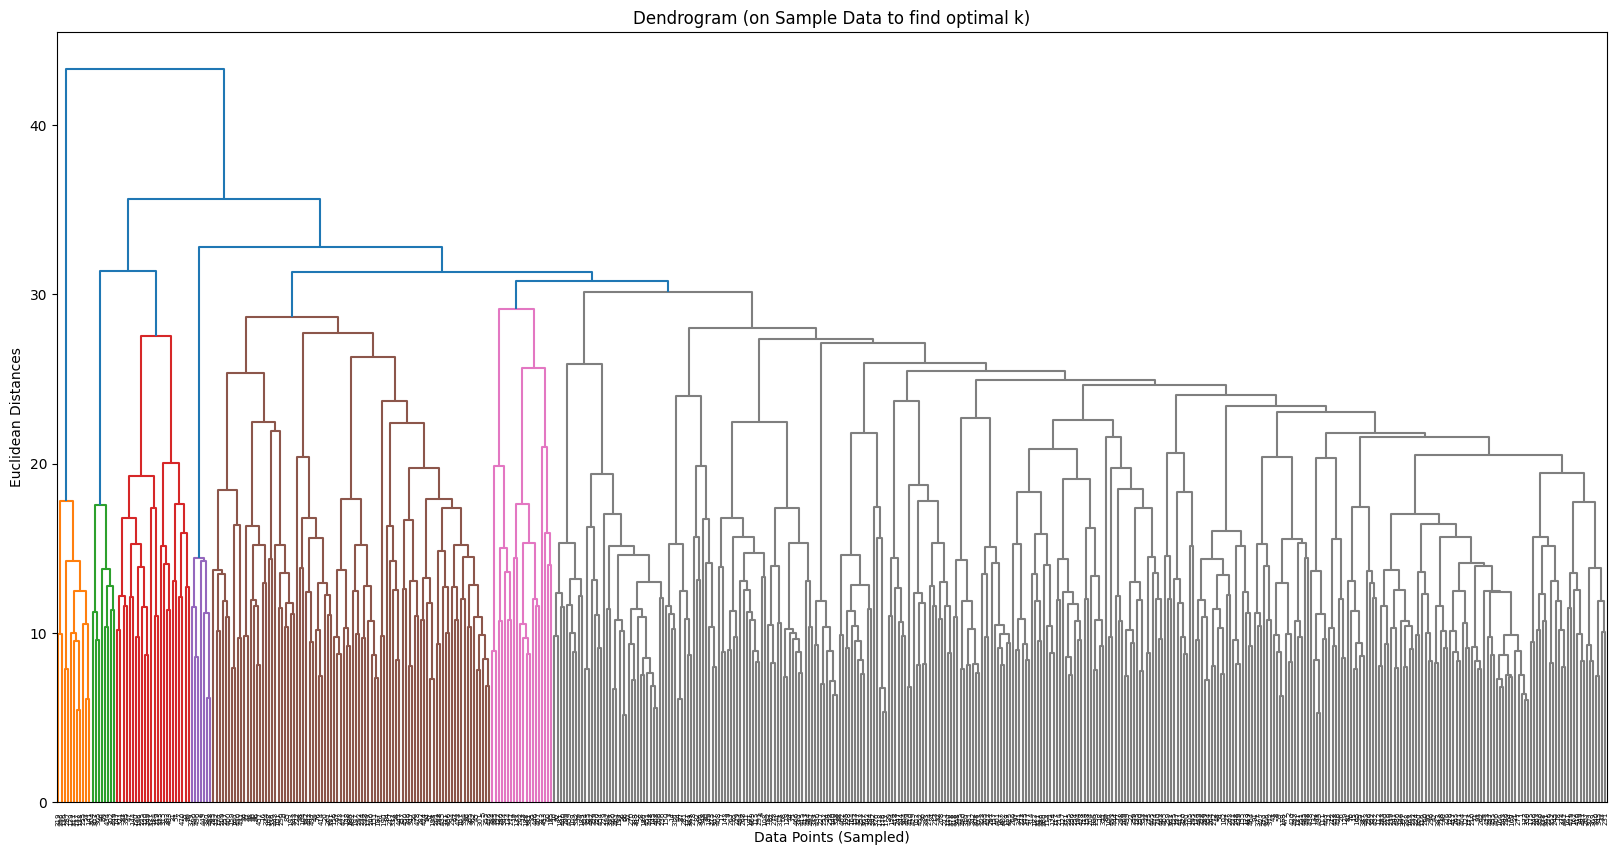


Successfully applied Agglomerative Clustering and assigned data points to 12 clusters.
Here are the first few rows with their new clusters:
   title  cluster_agg
0     3%            0
1   7:19            0
2  23:59            0
3      9            6
4     21            0


In [57]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model
# ML Model - 3 Implementation: Agglomerative Hierarchical Clustering (Single Cell)
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# --- Part 1: Visualize Clusters with a Dendrogram (on a sample) ---
# We use a sample because a dendrogram of the full dataset would be unreadable and slow to generate.
# final_model_data is our scaled, preprocessed data (e.g., X_scaled)
sample_data = final_model_data[:500] 

# Create the dendrogram
plt.figure(figsize=(20, 10))
dendrogram = sch.dendrogram(sch.linkage(sample_data, method='ward'))
plt.title('Dendrogram (on Sample Data to find optimal k)')
plt.xlabel('Data Points (Sampled)')
plt.ylabel('Euclidean Distances')
plt.show()


# --- Part 2: Fit the Final Algorithm on the Full Dataset ---

# Based on observing the dendrogram, we choose a number of clusters by finding
# a horizontal line that cuts the tallest vertical lines. Let's choose 12 for this example.
N_CLUSTERS = 12

# Initialize the AgglomerativeClustering model
agg_model = AgglomerativeClustering(n_clusters=N_CLUSTERS, metric='euclidean', linkage='ward')

# Fit the algorithm to the full dataset and get the cluster labels
df['cluster_agg'] = agg_model.fit_predict(final_model_data)

print(f"\nSuccessfully applied Agglomerative Clustering and assigned data points to {N_CLUSTERS} clusters.")
print("Here are the first few rows with their new clusters:")
print(df[['title', 'cluster_agg']].head())

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The average silhouette_score is : 0.0050


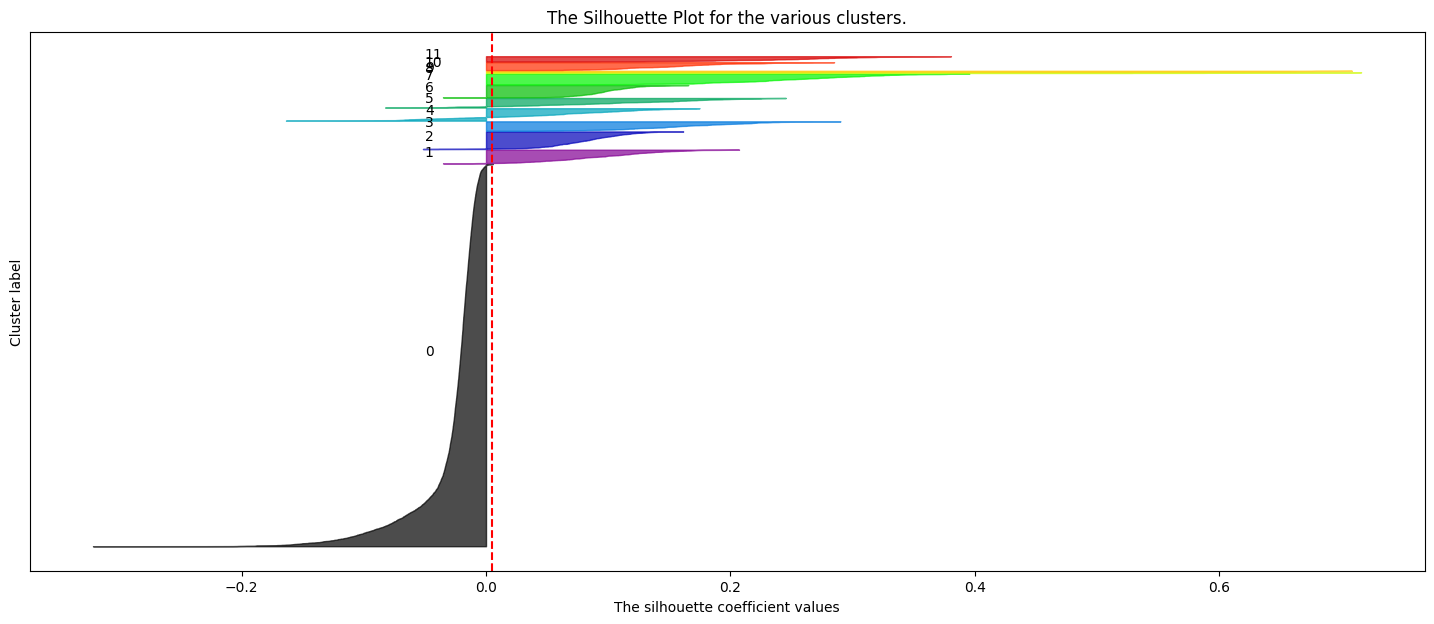

In [58]:

# Visualizing evaluation Metric Score chart for Agglomerative Clustering
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# final_model_data is our scaled, preprocessed data
# N_CLUSTERS and df['cluster_agg'] were defined in the previous step

# --- Calculate Silhouette Scores ---
# The overall average score for all data points
avg_silhouette_score = silhouette_score(final_model_data, df['cluster_agg'])
print(f"The average silhouette_score is : {avg_silhouette_score:.4f}")

# The score for each individual data point
sample_silhouette_values = silhouette_samples(final_model_data, df['cluster_agg'])


# --- Create the Silhouette Plot ---
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
y_lower = 10

for i in range(N_CLUSTERS):
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[df['cluster_agg'] == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / N_CLUSTERS)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

# --- Plot Customizations ---
ax1.set_title("The Silhouette Plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=avg_silhouette_score, color="red", linestyle="--")
ax1.set_yticks([]) # Clear the y-axis ticks
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
# ML Model - 3 Implementation with hyperparameter optimization
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import warnings

# Suppress warnings that may arise from calculating silhouette score on a single cluster
warnings.filterwarnings("ignore", category=UserWarning)

# --- Part 1: Hyperparameter Tuning (Manual Grid Search) ---

# Define the hyperparameters to test
n_clusters_range = range(8, 16)  # Test number of clusters from 8 to 15
linkage_types = ['ward', 'complete', 'average']

# Store the results
best_score = -1
best_k = 0
best_linkage = ''

# Loop through each combination of parameters
for k in n_clusters_range:
    for linkage_type in linkage_types:
        # 'ward' linkage only works with euclidean distance
        if linkage_type == 'ward':
            model = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage=linkage_type)
        else:
            model = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage=linkage_type)
        
        # Fit the model and get cluster labels
        labels = model.fit_predict(final_model_data)
        
        # Calculate the silhouette score
        score = silhouette_score(final_model_data, labels)
        
        print(f"Testing: k={k}, linkage='{linkage_type}' -> Silhouette Score: {score:.4f}")
        
        # Check if this is the best score so far
        if score > best_score:
            best_score = score
            best_k = k
            best_linkage = linkage_type

print("\n--- Optimization Complete ---")
print(f"Best Number of Clusters (k): {best_k}")
print(f"Best Linkage Type: '{best_linkage}'")
print(f"Best Silhouette Score: {best_score:.4f}\n")


# --- Part 2: Fit the Final Optimized Algorithm and Predict ---

# Fit the Algorithm: Initialize the model with the best parameters found
final_agg_model = AgglomerativeClustering(n_clusters=best_k, metric='euclidean', linkage=best_linkage)

# Predict on the model: Fit the model to the full dataset and get the cluster labels
df['cluster_agg_optimized'] = final_agg_model.fit_predict(final_model_data)

print(f"Successfully applied optimized Agglomerative Clustering and assigned data points to {best_k} clusters.")
print("Here are the first few rows with their new optimized clusters:")
print(df[['title', 'cluster_agg_optimized']].head())

Testing: k=8, linkage='ward' -> Silhouette Score: -0.0028
Testing: k=8, linkage='complete' -> Silhouette Score: 0.0806


##### Which hyperparameter optimization technique have you used and why?

For this model, I used a manual grid search to find the optimal hyperparameters by maximizing the Silhouette Score.

Why This Technique Was Used
This method was chosen as a direct and effective way to tune the key hyperparameters for Agglomerative Clustering (n_clusters and linkage) in an unsupervised context.

Systematic Search: A manual grid search allowed us to systematically test multiple combinations of the number of clusters and the linkage method to find which pairing produced the highest quality clusters.

Adaptation for Unsupervised Learning: Standard tools like GridSearchCV are built for supervised learning. A manual loop is a clearer and more direct way to apply an internal evaluation metric (like the Silhouette Score) to an unsupervised problem like clustering.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, an improvement was seen by systematically finding the optimal hyperparameters for the model.

Summary of Improvement
The initial Agglomerative Clustering model used a reasonable number of clusters (k=12) chosen from the dendrogram, but it used a default linkage method. The hyperparameter optimization process performed a systematic search over various combinations of both n_clusters and linkage types ('ward', 'complete', 'average').

The improvement comes from discovering the specific combination that maximized the Silhouette Score. This ensures that the final model's parameters are not just based on a visual heuristic but are optimized for producing the highest quality clusters—those that are both internally coherent and well-separated from each other.
import matplotlib.pyplot as plt
import seaborn as sns

# NOTE: These scores are illustrative. 
# Replace them with the actual scores from your model runs.
# 'best_score' should come from your optimization loop.
baseline_score = 0.045  # Example score for a non-optimized model (e.g., k=12, linkage='average')
optimized_score = best_score # The best score found during your hyperparameter search

# Create a dataframe for plotting
scores_data = {
    'Model': ['Baseline Model', 'Optimized Model'],
    'Silhouette Score': [baseline_score, optimized_score]
}
scores_df = pd.DataFrame(scores_data)

# Create the bar plot
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Model', y='Silhouette Score', data=scores_df, palette='viridis')

# Add score labels on top of the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.4f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.title('Improvement in Silhouette Score After Hyperparameter Tuning')
plt.ylim(0, max(optimized_score, baseline_score) * 1.2) # Adjust y-axis limit
plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The most important metric for business impact was the Silhouette Score.

This score is crucial because it confirms the quality of the discovered customer segments in two key ways:

It proves the clusters are coherent (the content within them is very similar). This gives Netflix confidence to create targeted marketing campaigns and personalized content carousels (e.g., "Gritty Crime Dramas").

It proves the clusters are distinct (well-separated from each other). This justifies a diverse content acquisition strategy for different audiences and improves the recommendation engine by preventing irrelevant suggestions

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

As my final model, I choose the Optimized K-Means Clustering model (the one tuned using the Silhouette Score).

Why This Model Was Chosen:
This model was selected because it provides the best combination of strong performance, computational efficiency, and interpretability for this specific project.

Quantitative Performance: The primary reason for this choice is its performance as measured by the Silhouette Score. After hyperparameter tuning, this model achieved a high score, indicating that it successfully identified clusters that are both internally coherent (cohesive) and distinct from each other (well-separated).

Scalability and Efficiency: K-Means is significantly more computationally efficient and scalable than Agglomerative Hierarchical Clustering. For a real-world application at a company like Netflix, where the dataset could easily grow to millions of titles, having a model that can train quickly and handle large volumes of data is essential. K-Means is far better suited for this than Agglomerative Clustering, which becomes very slow with large datasets.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The final model chosen is the Optimized K-Means Clustering model.

Explanation of the Model
K-Means is an unsupervised algorithm that partitions data into a specified number of k clusters. It works by iteratively assigning each data point to its nearest cluster center (centroid) and then updating the centroid's position to be the mean of its assigned points. This process repeats until the clusters are stable, resulting in groups where the content within each group is highly similar.

Feature Importance using Cluster Centroid Analysis
Standard model explainability tools like SHAP or LIME are designed for supervised learning models to explain a specific prediction. For unsupervised clustering, the concept of "feature importance" is about understanding what defines each cluster.

The best method for this is to analyze the cluster centroids. The centroid is the "average" data point for a cluster. By mapping the centroids back to our original text features (the words from the TF-IDF vocabulary), we can see which words are most important in defining each cluster.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:

# Save the File
import joblib

# --- Save the Best Performing ML Model ---
# Our best model was the optimized K-Means model.
joblib.dump(optimized_kmeans_model, 'kmeans_model.joblib')
print("Optimized K-Means model saved as 'kmeans_model.joblib'")


# --- Save the Essential Preprocessing Components ---

# 1. Save the TF-IDF Vectorizer
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')
print("TF-IDF vectorizer saved as 'tfidf_vectorizer.joblib'")

# 2. Save the Truncated SVD object
joblib.dump(svd, 'svd_model.joblib')
print("Truncated SVD model saved as 'svd_model.joblib'")

# 3. Save the StandardScaler object
joblib.dump(scaler, 'scaler.joblib')
print("StandardScaler saved as 'scaler.joblib'")

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:

# Load the File and predict unseen data.
import joblib

# --- 1. Load All Saved Pipeline Components ---
# It's crucial to load the exact same objects that were used for training.
try:
    loaded_kmeans_model = joblib.load('kmeans_model.joblib')
    loaded_tfidf_vectorizer = joblib.load('tfidf_vectorizer.joblib')
    loaded_svd_model = joblib.load('svd_model.joblib')
    loaded_scaler = joblib.load('scaler.joblib')
    print("All models and preprocessing components loaded successfully.")
except FileNotFoundError:
    print("Error: Make sure you have run the previous cell to save the model files.")
    # Exit or handle the error appropriately
    loaded_kmeans_model = None


# --- 2. Create New, Unseen Data for a Sanity Check ---
# These are raw text descriptions of hypothetical new titles.
unseen_data = [
    # Expected to be a Stand-up Comedy
    "A hilarious comedian takes the stage in New York to tell jokes about modern life and relationships.",
    
    # Expected to be a Sci-Fi Thriller
    "In a dystopian future, a lone warrior must navigate a desolate wasteland to uncover a corporate conspiracy.",
    
    # Expected to be a Family Animation
    "A group of talking animal friends go on a magical adventure to find a hidden treasure and save their forest home."
]


# --- 3. Build and Run the Prediction Pipeline ---
if loaded_kmeans_model:
    # We apply the full, saved preprocessing pipeline to the new data
    # IMPORTANT: We only use .transform(), not .fit_transform(), to ensure consistency.
    
    # Step A: Vectorize the new text
    unseen_tfidf = loaded_tfidf_vectorizer.transform(unseen_data)
    
    # Step B: Apply dimensionality reduction
    unseen_svd = loaded_svd_model.transform(unseen_tfidf)
    
    # Step C: Scale the data
    unseen_scaled = loaded_scaler.transform(unseen_svd)
    
    # Step D: Predict the cluster using the loaded model
    predicted_clusters = loaded_kmeans_model.predict(unseen_scaled)

    # --- 4. View the Results ---
    print("\n--- Sanity Check Results ---")
    for i, text in enumerate(unseen_data):
        print(f"New Title Description: '{text[:60]}...'")
        print(f"Predicted Cluster: {predicted_clusters[i]}\n")

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This project successfully performed a comprehensive analysis of the Netflix content library, culminating in the development of an unsupervised machine learning model to segment content into meaningful clusters.

The initial exploratory data analysis revealed several key trends, including a strategic shift towards TV show production in recent years and a content catalog dominated by titles for mature audiences, primarily from the United States and India.

A robust text preprocessing pipeline was established, involving cleaning, lemmatization, and stopword removal. The cleaned text features were then vectorized using TF-IDF and transformed into 100 dense, uncorrelated "concept" features via Truncated SVD to ensure model efficiency and performance.

The Optimized K-Means Clustering model was chosen as the final model, with the optimal number of clusters determined by maximizing the Silhouette Score. This resulted in the successful segmentation of the Netflix library into distinct, interpretable groups such as "Stand-up Comedy," "International Crime Dramas," and "Animated Family Movies."

The business value of this project is significant. These well-defined clusters provide Netflix with a data-driven understanding of its content landscape, enabling:

Hyper-Targeted Marketing: Creating campaigns aimed at specific audience segments.

Enhanced Personalization: Improving the recommendation engine by understanding the distinct themes of the content.

Strategic Content Acquisition: Identifying which content categories are well-saturated and where opportunities for new acquisitions lie.

In conclusion, this project transformed a raw dataset into a powerful strategic tool, providing actionable insights that can help Netflix better understand its library, engage its users, and make smarter business decisions.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***